# Does post-secondary education decrease the rate of crime in cities?

## An investigation of correlation between increase in the number of academic centers and libraries and decrease in the rate of crime in American cities.

## Iman Soltani

# Data Cleaning:

## Scrapping information tables and transforming them into a Pandas dataframe

Importing libraries

In [2]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

## List of United States cities by crime rate

**Crime rates per 100,000 people per year**


**Total number of Violent crime (inlcuding murder and nonnegligent manslaughter, rape, rubbery, aggravated assault)cases per 100,000 people per year**


In [27]:
#Using read_html function of pd. 
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate'
Cdf = pd.read_html(url)
print(len(Cdf))
Cdf

2


[                   State                   City Population Violent crime  \
                    State                   City Population         Total   
 0                Alabama                Mobile3     248431        740.25   
 1                 Alaska              Anchorage     296188       1203.29   
 2                Arizona               Chandler     249355        259.47   
 3                Arizona                Gilbert     242090         85.51   
 4                Arizona               Glendale     249273        488.22   
 5                Arizona                   Mesa     492268        415.83   
 6                Arizona                Phoenix    1644177        760.93   
 7                Arizona             Scottsdale     251840        157.24   
 8                Arizona                 Tucson     532323        801.77   
 9             California                Anaheim     353400        354.56   
 10            California            Bakersfield     381154        479.33   

So, read_html assumes 2 tables in the webpage and pick for the first one which is the real table we are seeking for.

In [28]:
Cdf1=Cdf[0]  # Getting the first table
Cdf1

State                   City Population Violent crime  \
                   State                   City Population         Total   
0                Alabama                Mobile3     248431        740.25   
1                 Alaska              Anchorage     296188       1203.29   
2                Arizona               Chandler     249355        259.47   
3                Arizona                Gilbert     242090         85.51   
4                Arizona               Glendale     249273        488.22   
5                Arizona                   Mesa     492268        415.83   
6                Arizona                Phoenix    1644177        760.93   
7                Arizona             Scottsdale     251840        157.24   
8                Arizona                 Tucson     532323        801.77   
9             California                Anaheim     353400        354.56   
10            California            Bakersfield     381154        479.33   
11            California            Chula Vista     271109        298.04   
12            California                Fremont     236368        182.34   
13            California                 Fresno     526371        565.00   
14            California                 Irvine     276115         61.21   
15            California             Long Beach     471397        657.83   
16            California            Los Angeles    4007147        761.31   
17            California                Oakland     424915       1299.32   
18            California              Riverside     328023        508.81   
19            California             Sacramento     499997        675.60   
20            California         San Bernardino     217259       1291.09   
21            California              San Diego    1424116        366.61   
22            California          San Francisco     881255        715.00   
23            California               San Jose    1037529        403.65   
24            California              Santa Ana     335699        488.53   
25            California          Santa Clarita     216350        162.70   
26            California              Stockton4     309566       1414.56   
27              Colorado                 Aurora     368018        608.39   
28              Colorado       Colorado Springs     472958        524.15   
29              Colorado                 Denver     706616        675.61   
30  District of Columbia             Washington     693972        948.74   
31               Florida                Hialeah     238260        198.52   
32               Florida           Jacksonville     894638        631.32   
33               Florida                  Miami     463009        720.94   
34               Florida                Orlando     283982        744.06   
35               Florida         St. Petersburg     263712        698.49   
36               Florida                  Tampa     384360        464.41   
37               Georgia                Atlanta     481343        935.72   
38               Georgia               Savannah     242941        462.66   
39                Hawaii               Honolulu     990384        246.37   
40                 Idaho                  Boise     225677        279.16   
41              Illinois                Chicago    2706171       1098.86   
42               Indiana             Fort Wayne     266259        357.55   
43               Indiana           Indianapolis     870788       1333.96   
44                  Iowa             Des Moines     217277        670.11   
45                Kansas                Wichita     391084       1022.29   
46              Kentucky              Lexington     322332        350.88   
47              Kentucky      Louisville Metro6     684362        647.03   
48             Louisiana            Baton Rouge     227403       1026.81   
49             Louisiana            New Orleans     397447       1121.41   
50              Maryland              Baltimore     613217       20

In [ ]:
#display(list(df.columns.values)) 

In [29]:
#getting a list of the Cdf1 columns headings.
Cdf1.columns.values

array([('State', 'State'), ('City', 'City'), ('Population', 'Population'),
       ('Violent crime', 'Total'),
       ('Violent crime', 'Murder andNonnegligentmanslaughter'),
       ('Violent crime', 'Rape1'), ('Violent crime', 'Robbery'),
       ('Violent crime', 'Aggravatedassault'),
       ('Property crime', 'Total'), ('Property crime', 'Burglary'),
       ('Property crime', 'Larceny-theft'),
       ('Property crime', 'Motorvehicletheft'), ('Arson2', 'Arson2')],
      dtype=object)

In [30]:
#changing the columns headings in our dataframe
Cdf1.columns = ['State','City','Population','Total Violent Crime','Murder & Nonnegligent Manslaughter','Rape','Robbery',
               'Aggravated Assault','Total Property crime','Burglary','Larceny Theft','Motor Vehicle Theft', 'Arson' ]
Cdf1

State                   City  Population  \
0                Alabama                Mobile3      248431   
1                 Alaska              Anchorage      296188   
2                Arizona               Chandler      249355   
3                Arizona                Gilbert      242090   
4                Arizona               Glendale      249273   
5                Arizona                   Mesa      492268   
6                Arizona                Phoenix     1644177   
7                Arizona             Scottsdale      251840   
8                Arizona                 Tucson      532323   
9             California                Anaheim      353400   
10            California            Bakersfield      381154   
11            California            Chula Vista      271109   
12            California                Fremont      236368   
13            California                 Fresno      526371   
14            California                 Irvine      276115   
15            California             Long Beach      471397   
16            California            Los Angeles     4007147   
17            California                Oakland      424915   
18            California              Riverside      328023   
19            California             Sacramento      499997   
20            California         San Bernardino      217259   
21            California              San Diego     1424116   
22            California          San Francisco      881255   
23            California               San Jose     1037529   
24            California              Santa Ana      335699   
25            California          Santa Clarita      216350   
26            California              Stockton4      309566   
27              Colorado                 Aurora      368018   
28              Colorado       Colorado Springs      472958   
29              Colorado                 Denver      706616   
30  District of Columbia             Washington      693972   
31               Florida                Hialeah      238260   
32               Florida           Jacksonville      894638   
33               Florida                  Miami      463009   
34               Florida                Orlando      283982   
35               Florida         St. Petersburg      263712   
36               Florida                  Tampa      384360   
37               Georgia                Atlanta      481343   
38               Georgia               Savannah      242941   
39                Hawaii               Honolulu      990384   
40                 Idaho                  Boise      225677   
41              Illinois                Chicago     2706171   
42               Indiana             Fort Wayne      266259   
43               Indiana           Indianapolis      870788   
44                  Iowa             Des Moines      217277   
45                Kansas                Wichita      391084   
46              Kentucky              Lexington      322332   
47              Kentucky      Louisville Metro6      684362   
48             Louisiana            Baton Rouge      227403   
49             Louisiana            New Orleans      397447   
50              Maryland              Baltimore      613217   
51         Massachusetts                 Boston      682903   
52              Michigan                Detroit      670792   
53             Minnesota            Minneapolis      418971   
54             Minnesota               St. Paul      306696   
55              Missouri            Kansas City      484948   
56              Missouri              St. Louis      310284   
57              Nebraska                  Omaha      449388   
58                Nevada              Henderson      299285   
59                Nevada              Las Vegas      627244   
60                Nevada        North Las Vegas      242537   
61                Nevada                   Reno      248531   
62            New Jersey            Jersey City   

In [31]:
#Dropping the df row where price 'Total Violent Crime'or'Total Property crime' is NaN.
Cdf2=Cdf1.dropna(subset=['Total Violent Crime','Total Property crime'], axis=0)   
Cdf2

State               City  Population  Total Violent Crime  \
0                Alabama            Mobile3      248431               740.25   
1                 Alaska          Anchorage      296188              1203.29   
2                Arizona           Chandler      249355               259.47   
3                Arizona            Gilbert      242090                85.51   
4                Arizona           Glendale      249273               488.22   
5                Arizona               Mesa      492268               415.83   
6                Arizona            Phoenix     1644177               760.93   
7                Arizona         Scottsdale      251840               157.24   
8                Arizona             Tucson      532323               801.77   
9             California            Anaheim      353400               354.56   
10            California        Bakersfield      381154               479.33   
11            California        Chula Vista      271109               298.04   
12            California            Fremont      236368               182.34   
13            California             Fresno      526371               565.00   
14            California             Irvine      276115                61.21   
15            California         Long Beach      471397               657.83   
16            California        Los Angeles     4007147               761.31   
17            California            Oakland      424915              1299.32   
18            California          Riverside      328023               508.81   
19            California         Sacramento      499997               675.60   
20            California     San Bernardino      217259              1291.09   
21            California          San Diego     1424116               366.61   
22            California      San Francisco      881255               715.00   
23            California           San Jose     1037529               403.65   
24            California          Santa Ana      335699               488.53   
25            California      Santa Clarita      216350               162.70   
26            California          Stockton4      309566              1414.56   
27              Colorado             Aurora      368018               608.39   
28              Colorado   Colorado Springs      472958               524.15   
29              Colorado             Denver      706616               675.61   
30  District of Columbia         Washington      693972               948.74   
31               Florida            Hialeah      238260               198.52   
32               Florida       Jacksonville      894638               631.32   
33               Florida              Miami      463009               720.94   
34               Florida            Orlando      283982               744.06   
35               Florida     St. Petersburg      263712               698.49   
36               Florida              Tampa      384360               464.41   
37               Georgia            Atlanta      481343               935.72   
38               Georgia           Savannah      242941               462.66   
39                Hawaii           Honolulu      990384               246.37   
40                 Idaho              Boise      225677               279.16   
41              Illinois            Chicago     2706171              1098.86   
42               Indiana         Fort Wayne      266259               357.55   
43               Indiana       Indianapolis      870788              1333.96   
44                  Iowa         Des Moines      217277               670.11   
45                Kansas            Wichita      391084              1022.29   
46              Kentucky          Lexington      322332               350.88   
47              Kentucky  Louisville Metro6      684362               647.03   
48             Louisiana        Baton Rouge      227403              1026.81   
49             Loui

In [32]:
#Removing the numbers from the cities names.
Cdf2['City'] = Cdf2['City'].str.replace('\d+', '')
Cdf2

<ipython-input-32-3c251d3d2073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cdf2['City'] = Cdf2['City'].str.replace('\d+', '')


State              City  Population  Total Violent Crime  \
0                Alabama            Mobile      248431               740.25   
1                 Alaska         Anchorage      296188              1203.29   
2                Arizona          Chandler      249355               259.47   
3                Arizona           Gilbert      242090                85.51   
4                Arizona          Glendale      249273               488.22   
5                Arizona              Mesa      492268               415.83   
6                Arizona           Phoenix     1644177               760.93   
7                Arizona        Scottsdale      251840               157.24   
8                Arizona            Tucson      532323               801.77   
9             California           Anaheim      353400               354.56   
10            California       Bakersfield      381154               479.33   
11            California       Chula Vista      271109               298.04   
12            California           Fremont      236368               182.34   
13            California            Fresno      526371               565.00   
14            California            Irvine      276115                61.21   
15            California        Long Beach      471397               657.83   
16            California       Los Angeles     4007147               761.31   
17            California           Oakland      424915              1299.32   
18            California         Riverside      328023               508.81   
19            California        Sacramento      499997               675.60   
20            California    San Bernardino      217259              1291.09   
21            California         San Diego     1424116               366.61   
22            California     San Francisco      881255               715.00   
23            California          San Jose     1037529               403.65   
24            California         Santa Ana      335699               488.53   
25            California     Santa Clarita      216350               162.70   
26            California          Stockton      309566              1414.56   
27              Colorado            Aurora      368018               608.39   
28              Colorado  Colorado Springs      472958               524.15   
29              Colorado            Denver      706616               675.61   
30  District of Columbia        Washington      693972               948.74   
31               Florida           Hialeah      238260               198.52   
32               Florida      Jacksonville      894638               631.32   
33               Florida             Miami      463009               720.94   
34               Florida           Orlando      283982               744.06   
35               Florida    St. Petersburg      263712               698.49   
36               Florida             Tampa      384360               464.41   
37               Georgia           Atlanta      481343               935.72   
38               Georgia          Savannah      242941               462.66   
39                Hawaii          Honolulu      990384               246.37   
40                 Idaho             Boise      225677               279.16   
41              Illinois           Chicago     2706171              1098.86   
42               Indiana        Fort Wayne      266259               357.55   
43               Indiana      Indianapolis      870788              1333.96   
44                  Iowa        Des Moines      217277               670.11   
45                Kansas           Wichita      391084              1022.29   
46              Kentucky         Lexington      322332               350.88   
47              Kentucky  Louisville Metro      684362               647.03   
48             Louisiana       Baton Rouge      227403              1026.81   
49             Louisiana       New Orleans      397447              1

In [33]:
#Resetting the index column
Cdf3=Cdf2.reset_index(drop=True) #and dropping the old index column.
Cdf3

State              City  Population  Total Violent Crime  \
0                Alabama            Mobile      248431               740.25   
1                 Alaska         Anchorage      296188              1203.29   
2                Arizona          Chandler      249355               259.47   
3                Arizona           Gilbert      242090                85.51   
4                Arizona          Glendale      249273               488.22   
5                Arizona              Mesa      492268               415.83   
6                Arizona           Phoenix     1644177               760.93   
7                Arizona        Scottsdale      251840               157.24   
8                Arizona            Tucson      532323               801.77   
9             California           Anaheim      353400               354.56   
10            California       Bakersfield      381154               479.33   
11            California       Chula Vista      271109               298.04   
12            California           Fremont      236368               182.34   
13            California            Fresno      526371               565.00   
14            California            Irvine      276115                61.21   
15            California        Long Beach      471397               657.83   
16            California       Los Angeles     4007147               761.31   
17            California           Oakland      424915              1299.32   
18            California         Riverside      328023               508.81   
19            California        Sacramento      499997               675.60   
20            California    San Bernardino      217259              1291.09   
21            California         San Diego     1424116               366.61   
22            California     San Francisco      881255               715.00   
23            California          San Jose     1037529               403.65   
24            California         Santa Ana      335699               488.53   
25            California     Santa Clarita      216350               162.70   
26            California          Stockton      309566              1414.56   
27              Colorado            Aurora      368018               608.39   
28              Colorado  Colorado Springs      472958               524.15   
29              Colorado            Denver      706616               675.61   
30  District of Columbia        Washington      693972               948.74   
31               Florida           Hialeah      238260               198.52   
32               Florida      Jacksonville      894638               631.32   
33               Florida             Miami      463009               720.94   
34               Florida           Orlando      283982               744.06   
35               Florida    St. Petersburg      263712               698.49   
36               Florida             Tampa      384360               464.41   
37               Georgia           Atlanta      481343               935.72   
38               Georgia          Savannah      242941               462.66   
39                Hawaii          Honolulu      990384               246.37   
40                 Idaho             Boise      225677               279.16   
41              Illinois           Chicago     2706171              1098.86   
42               Indiana        Fort Wayne      266259               357.55   
43               Indiana      Indianapolis      870788              1333.96   
44                  Iowa        Des Moines      217277               670.11   
45                Kansas           Wichita      391084              1022.29   
46              Kentucky         Lexington      322332               350.88   
47              Kentucky  Louisville Metro      684362               647.03   
48             Louisiana       Baton Rouge      227403              1026.81   
49             Louisiana       New Orleans      397447              1

In [34]:
# Double-checking of not having any NaN in the merged df.
Cdf3.isnull().values.any()

True

In [11]:
#We can check to see how many null objects we have in the dataset as follows:
Cdf3.isnull().sum()

State                                 0
City                                  0
Population                            0
Total Violent Crime                   0
Murder & Nonnegligent Manslaughter    0
Rape                                  0
Robbery                               0
Aggravated Assault                    0
Total Property crime                  0
Burglary                              0
Larceny Theft                         0
Motor Vehicle Theft                   0
Arson                                 7
dtype: int64

In [35]:
#Since 7 there is no arson data for 7 cities, I decide to remove the column entirely.
Cdf3.drop(['Arson'], axis=1, inplace=True)
Cdf3

State              City  Population  Total Violent Crime  \
0                Alabama            Mobile      248431               740.25   
1                 Alaska         Anchorage      296188              1203.29   
2                Arizona          Chandler      249355               259.47   
3                Arizona           Gilbert      242090                85.51   
4                Arizona          Glendale      249273               488.22   
5                Arizona              Mesa      492268               415.83   
6                Arizona           Phoenix     1644177               760.93   
7                Arizona        Scottsdale      251840               157.24   
8                Arizona            Tucson      532323               801.77   
9             California           Anaheim      353400               354.56   
10            California       Bakersfield      381154               479.33   
11            California       Chula Vista      271109               298.04   
12            California           Fremont      236368               182.34   
13            California            Fresno      526371               565.00   
14            California            Irvine      276115                61.21   
15            California        Long Beach      471397               657.83   
16            California       Los Angeles     4007147               761.31   
17            California           Oakland      424915              1299.32   
18            California         Riverside      328023               508.81   
19            California        Sacramento      499997               675.60   
20            California    San Bernardino      217259              1291.09   
21            California         San Diego     1424116               366.61   
22            California     San Francisco      881255               715.00   
23            California          San Jose     1037529               403.65   
24            California         Santa Ana      335699               488.53   
25            California     Santa Clarita      216350               162.70   
26            California          Stockton      309566              1414.56   
27              Colorado            Aurora      368018               608.39   
28              Colorado  Colorado Springs      472958               524.15   
29              Colorado            Denver      706616               675.61   
30  District of Columbia        Washington      693972               948.74   
31               Florida           Hialeah      238260               198.52   
32               Florida      Jacksonville      894638               631.32   
33               Florida             Miami      463009               720.94   
34               Florida           Orlando      283982               744.06   
35               Florida    St. Petersburg      263712               698.49   
36               Florida             Tampa      384360               464.41   
37               Georgia           Atlanta      481343               935.72   
38               Georgia          Savannah      242941               462.66   
39                Hawaii          Honolulu      990384               246.37   
40                 Idaho             Boise      225677               279.16   
41              Illinois           Chicago     2706171              1098.86   
42               Indiana        Fort Wayne      266259               357.55   
43               Indiana      Indianapolis      870788              1333.96   
44                  Iowa        Des Moines      217277               670.11   
45                Kansas           Wichita      391084              1022.29   
46              Kentucky         Lexington      322332               350.88   
47              Kentucky  Louisville Metro      684362               647.03   
48             Louisiana       Baton Rouge      227403              1026.81   
49             Louisiana       New Orleans      397447              1

In [36]:
#Setting maxcolwidth to 800 for good viewability
pd.set_option('max_colwidth', 800)
#Centering the header text in pandas dataframe
pd.set_option('colheader_justify', 'center')


## Automatic way of finding the cities geoghraphic coordinates.

In [38]:
# In the case of cities we need to pass the state of the city to the geopy as well to avoid any mistake. 
#Therefore we better add the first two letters of the state as well after a comma. 
Cdf3['City, State']=Cdf3[['City','State']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)
Cdf3.head()

State       City  Population  Total Violent Crime  \
0  Alabama     Mobile      248431               740.25   
1   Alaska  Anchorage      296188              1203.29   
2  Arizona   Chandler      249355               259.47   
3  Arizona    Gilbert      242090                85.51   
4  Arizona   Glendale      249273               488.22   

   Murder & Nonnegligent Manslaughter    Rape  Robbery  Aggravated Assault  \
0                               20.13   58.16   177.11              485.85   
1                                9.12  132.01   262.67              799.49   
2                                2.01   52.13    56.95              148.38   
3                                2.07   16.11    21.07               46.26   
4                                4.81   38.91   192.96              251.53   

   Total Property crime  Burglary  Larceny Theft  Motor Vehicle Theft  \
0               5453.83   1216.84        3730.21               506.78   
1               5415.82    748.17        3619.66              1047.98   
2               2329.61    314.41        1866.01               149.18   
3               1385.85    192.49        1137.59                55.76   
4               4530.37    637.45        3426.36               466.56   

         City, State  
0    Mobile, Alabama  
1  Anchorage, Alaska  
2  Chandler, Arizona  
3   Gilbert, Arizona  
4  Glendale, Arizona

Use geopy library to get the latitude and longitude values of the selected American cities. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent us_explorer, as shown below.

In [39]:
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 


In [40]:
geolocator = Nominatim(user_agent="us_explorer")
for i in range(Cdf3.shape[0]):
    location = geolocator.geocode(Cdf3.loc[i, 'City, State'])
    Cdf3.loc[i, 'Latitude'],  Cdf3.loc[i, 'Longitude'] = location.latitude, location.longitude
Cdf3

State              City  Population  Total Violent Crime  \
0                Alabama            Mobile      248431               740.25   
1                 Alaska         Anchorage      296188              1203.29   
2                Arizona          Chandler      249355               259.47   
3                Arizona           Gilbert      242090                85.51   
4                Arizona          Glendale      249273               488.22   
5                Arizona              Mesa      492268               415.83   
6                Arizona           Phoenix     1644177               760.93   
7                Arizona        Scottsdale      251840               157.24   
8                Arizona            Tucson      532323               801.77   
9             California           Anaheim      353400               354.56   
10            California       Bakersfield      381154               479.33   
11            California       Chula Vista      271109               298.04   
12            California           Fremont      236368               182.34   
13            California            Fresno      526371               565.00   
14            California            Irvine      276115                61.21   
15            California        Long Beach      471397               657.83   
16            California       Los Angeles     4007147               761.31   
17            California           Oakland      424915              1299.32   
18            California         Riverside      328023               508.81   
19            California        Sacramento      499997               675.60   
20            California    San Bernardino      217259              1291.09   
21            California         San Diego     1424116               366.61   
22            California     San Francisco      881255               715.00   
23            California          San Jose     1037529               403.65   
24            California         Santa Ana      335699               488.53   
25            California     Santa Clarita      216350               162.70   
26            California          Stockton      309566              1414.56   
27              Colorado            Aurora      368018               608.39   
28              Colorado  Colorado Springs      472958               524.15   
29              Colorado            Denver      706616               675.61   
30  District of Columbia        Washington      693972               948.74   
31               Florida           Hialeah      238260               198.52   
32               Florida      Jacksonville      894638               631.32   
33               Florida             Miami      463009               720.94   
34               Florida           Orlando      283982               744.06   
35               Florida    St. Petersburg      263712               698.49   
36               Florida             Tampa      384360               464.41   
37               Georgia           Atlanta      481343               935.72   
38               Georgia          Savannah      242941               462.66   
39                Hawaii          Honolulu      990384               246.37   
40                 Idaho             Boise      225677               279.16   
41              Illinois           Chicago     2706171              1098.86   
42               Indiana        Fort Wayne      266259               357.55   
43               Indiana      Indianapolis      870788              1333.96   
44                  Iowa        Des Moines      217277               670.11   
45                Kansas           Wichita      391084              1022.29   
46              Kentucky         Lexington      322332               350.88   
47              Kentucky  Louisville Metro      684362               647.03   
48             Louisiana       Baton Rouge      227403              1026.81   
49             Louisiana       New Orleans      397447              1

In [41]:
# Double-checking of not having any NaN in the merged df.
Cdf3.isnull().values.any()

False

In [18]:
Cdf3.to_csv('selected_US_cities_crime_rate_and_geoghraphic_coordinates')

In [42]:
#Since I have index error of list index out of range what if I make the df more brief?
Cdf4=Cdf3[['City','State','Latitude','Longitude']]
Cdf4

City                 State   Latitude   Longitude
0             Mobile               Alabama  30.694357  -88.043054
1          Anchorage                Alaska  61.216313 -149.894852
2           Chandler               Arizona  33.306160 -111.841250
3            Gilbert               Arizona  33.352763 -111.789037
4           Glendale               Arizona  33.538686 -112.185994
5               Mesa               Arizona  33.415112 -111.831479
6            Phoenix               Arizona  33.448437 -112.074142
7         Scottsdale               Arizona  33.494219 -111.926018
8             Tucson               Arizona  32.222876 -110.974848
9            Anaheim            California  33.834752 -117.911732
10       Bakersfield            California  35.373871 -119.019464
11       Chula Vista            California  32.640054 -117.084196
12           Fremont            California  37.548270 -121.988572
13            Fresno            California  36.729529 -119.708861
14            Irvine            California  33.685697 -117.825982
15        Long Beach            California  33.769016 -118.191604
16       Los Angeles            California  34.053691 -118.242766
17           Oakland            California  37.804456 -122.271356
18         Riverside            California  33.953355 -117.396162
19        Sacramento            California  38.581061 -121.493895
20    San Bernardino            California  34.825302 -116.083314
21         San Diego            California  32.717420 -117.162773
22     San Francisco            California  37.779026 -122.419906
23          San Jose            California  37.336191 -121.890583
24         Santa Ana            California  33.749495 -117.873221
25     Santa Clarita            California  34.391664 -118.542586
26          Stockton            California  37.957702 -121.290780
27            Aurora              Colorado  39.729432 -104.831920
28  Colorado Springs              Colorado  38.833958 -104.825349
29            Denver              Colorado  39.739236 -104.984862
30        Washington  District of Columbia  38.906514  -77.037377
31           Hialeah               Florida  25.857596  -80.278106
32      Jacksonville               Florida  30.332184  -81.655651
33             Miami               Florida  25.774173  -80.193620
34           Orlando               Florida  28.542111  -81.379030
35    St. Petersburg               Florida  27.770380  -82.669509
36             Tampa               Florida  27.947760  -82.458444
37           Atlanta               Georgia  33.748992  -84.390264
38          Savannah               Georgia  32.080926  -81.091177
39          Honolulu                Hawaii  21.304547 -157.855676
40             Boise                 Idaho  43.616616 -116.200886
41           Chicago              Illinois  41.875562  -87.624421
42        Fort Wayne               Indiana  41.079990  -85.138601
43      Indianapolis               Indiana  39.768333  -86.158350
44        Des Moines                  Iowa  41.591032  -93.604665
45           Wichita                Kansas  37.692236  -97.337545
46         Lexington              Kentucky  38.046407  -84.497039
47  Louisville Metro              Kentucky  38.254576  -85.759435
48       Baton Rouge             Louisiana  30.445960  -91.187380
49       New Orleans             Louisiana  29.949932  -90.070116
50         Baltimore              Maryland  39.290882  -76.610759
51            Boston         Massachusetts  42.360253  -71.058291
52           Detroit              Michigan  42.331551  -83.046640
53       Minneapolis             Minnesota  44.977300  -93.265469
54          St. Paul             Minnesota  44.950404  -93.101503
55       Kansas City              Missouri  39.100105  -94.578142
56         St. Louis              Missouri  38.626418  -90.199838
57             Omaha              Nebraska  41.258746  -95.938376
58         Henderson                Nevada  36.030113 -114.982619
59         Las Vegas                Nevada  36.167256 -1

## Exploring and clustering the American Cities.

Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [47]:
#Changing max columns to be displayed to no limit
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
# for transforming JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm      
import matplotlib.colors as colors


# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Creating a map of the United States with the selected cities superimposed on top.

Use geopy library to get the latitude and longitude values of United States. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent us_explorer, as shown below.

In [48]:
address= 'USA'
#Generating a geocoders instance using Nominatim function that converts the addresses into longitudes and latitudes.
geolocator = Nominatim(user_agent="us_explorer")
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The georgraphical coordinates of USA are {}, {}.'
      .format(latitude, longitude))

The georgraphical coordinates of USA are 39.7837304, -100.4458825.


Creating a map of the United States with the selected cities superimposed on top.

In [53]:
# create a map of United States using latitude and longitude values
map_USA = folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng, city, state in zip(Cdf3['Latitude'], Cdf3['Longitude'], Cdf3['City'], Cdf3['State']):
    label = '{}, {}'.format(city, state)  
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_USA)  
    
map_USA

Since the github link does not show the folium map I added a scanned copy of the map from Jupyter Notebook.

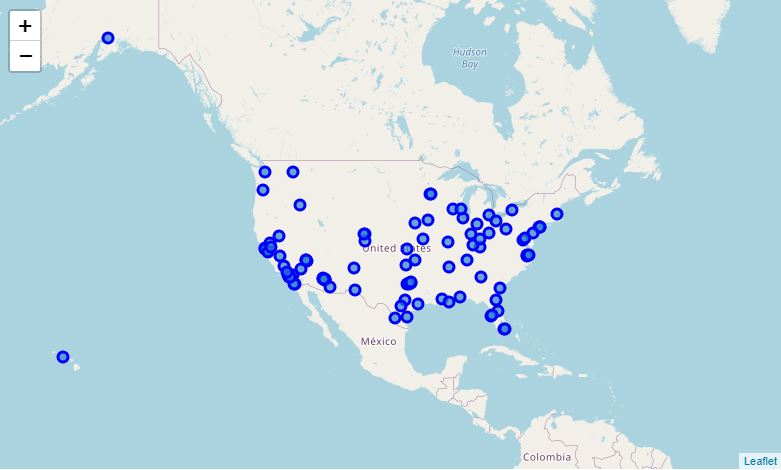

Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the city and its respective state.

Next, we are going to start utilizing the Foursquare API to explore the selected American cities and cluster them.

### Define Foursquare Credentials and Version

In [55]:
CLIENT_ID = 'XGF4JG24CDO3NBN2E2AT12KAODIK0BZDUD01QSKSEX55OOF4' # my Foursquare ID
CLIENT_SECRET = 'BJEB1QCCESQJ5VLZXKYPDJFJW0DTNT4C0BSAC0R0DWMNWPYR' # my Foursquare Secret
VERSION = '20201227' # Foursquare API version  
LIMIT = 1000 # A default Foursquare API limit value is 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XGF4JG24CDO3NBN2E2AT12KAODIK0BZDUD01QSKSEX55OOF4
CLIENT_SECRET:BJEB1QCCESQJ5VLZXKYPDJFJW0DTNT4C0BSAC0R0DWMNWPYR


#### Exploring the first city in our dataframe.

In [56]:
Cdf3.loc[0,'City']

'Mobile'

Get the city's (Mobile, AL) latitude and longitude values.



In [57]:
city_latitude = Cdf3.loc[0, 'Latitude'] # city latitude value 
city_longitude = Cdf3.loc[0, 'Longitude'] # city longitude value

city_name = Cdf3.loc[0, 'City'] # city name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

Latitude and longitude values of Mobile are 30.6943566, -88.0430541.


Now, let's search for the top 500 universities and colleges that are in Mobile within a radius of 5000 meters.

First, let's create the GET request URL. Name your URL url.

In [58]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
Search_query='University'+'College'


# create URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude,
    Search_query,
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/search?&client_id=XGF4JG24CDO3NBN2E2AT12KAODIK0BZDUD01QSKSEX55OOF4&client_secret=BJEB1QCCESQJ5VLZXKYPDJFJW0DTNT4C0BSAC0R0DWMNWPYR&v=20201227&ll=30.6943566,-88.0430541&query=UniversityCollege&radius=5000&limit=500'

Send the GET request and examine the resutls (The json file containing the 500 (limit) venues in the Mobile, Alabama (radius=5000m).

In [59]:
results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ffdddfeac791133542e9619'},
 'response': {'venues': [{'id': '4db040f55da32cf2df45763a',
    'name': 'University Of South Alabama - Springhill Avenue',
    'location': {'address': '1504 Spring Hill Ave',
     'lat': 30.693536064158753,
     'lng': -88.07206626455202,
     'labeledLatLngs': [{'label': 'display',
       'lat': 30.693536064158753,
       'lng': -88.07206626455202}],
     'distance': 2778,
     'postalCode': '36604',
     'cc': 'US',
     'city': 'Mobile',
     'state': 'AL',
     'country': 'United States',
     'formattedAddress': ['1504 Spring Hill Ave',
      'Mobile, AL 36604',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1b3941735',
      'name': 'Medical School',
      'pluralName': 'Medical Schools',
      'shortName': 'Medical School',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1610472958',
    

Now we are ready to clean the json and structure it into a pandas dataframe. Since we know that all the relevant information is in the venues key from the response key we make a dataframe out of the values of the venues key.

In [78]:
# generating a dataframe from the selected keys' values of the requested json file
venues = results['response']['venues']
    
city_universities = pd.json_normalize(venues) # flatten JSON (to form a dataframe)
city_universities.head()

id  \
0  4db040f55da32cf2df45763a   
1  4f48078de4b08df2fb1e581f   
2  4f61e87cc2eeec9ccf6dfbcd   
3  4c1913b2834e2d7fb0d52980   
4  51b9c1a1498e3b7c15465bc4   

                                                    name  \
0        University Of South Alabama - Springhill Avenue   
1  University Of South Alabama (Spring Hill Campus) SHAC   
2               University of South Alabama Heart Center   
3                         Bishop State Community College   
4          Bishop State College- Administration Building   

                                                                                                                                                                                                                                                                                                     categories  \
0                                                             [{'id': '4bf58dd8d48988d1b3941735', 'name': 'Medical School', 'pluralName': 'Medical Schools', 'shortName': 'Medical School', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_', 'suffix': '.png'}, 'primary': True}]   
1                                                                               [{'id': '4bf58dd8d48988d196941735', 'name': 'Hospital', 'pluralName': 'Hospitals', 'shortName': 'Hospital', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_', 'suffix': '.png'}, 'primary': True}]   
2                                            [{'id': '4bf58dd8d48988d177941735', 'name': 'Doctor's Office', 'pluralName': 'Doctor's Offices', 'shortName': 'Doctor's Office', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_', 'suffix': '.png'}, 'primary': True}]   
3                                          [{'id': '4bf58dd8d48988d1a2941735', 'name': 'Community College', 'pluralName': 'Community Colleges', 'shortName': 'Community College', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/communitycollege_', 'suffix': '.png'}, 'primary': True}]   
4  [{'id': '4bf58dd8d48988d197941735', 'name': 'College Administrative Building', 'pluralName': 'College Administrative Buildings', 'shortName': 'Administrative Building', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/administrativebuilding_', 'suffix': '.png'}, 'primary': True}]   

     referralId  hasPerk      location.address  location.lat  location.lng  \
0  v-1610472958    False  1504 Spring Hill Ave     30.693536    -88.072066   
1  v-1610472958    False                   NaN     30.698462    -88.077454   
2  v-1610472958    False     2451 Fillingim St     30.707283    -88.098822   
3  v-1610472958    False        351 N Broad St     30.694059    -88.057150   
4  v-1610472958    False                   NaN     30.696125    -88.055392   

                                                                                                                   location.labeledLatLngs  \
0                                                             [{'label': 'display', 'lat': 30.693536064158753, 'lng': -88.07206626455202}]   
1                                                              [{'label': 'display', 'lat': 30.69846218917211, 'lng': -88.07745401803548}]   
2                                                             [{'label': 'display', 'lat': 30.707282755655616, 'lng': -88.09882203870167}]   
3  [{'label': 'display', 'lat': 30.69405909558446, 'lng': -88.05714988078387}, {'label': 'entrance', 'lat': 30.695011, 'lng': -88.056193}]   
4                                                                      [{'label': 'display', 'lat': 30.696125, 'lng': -88.05539199999998}]   

   location.distance location.postalCode location.cc location.city  \
0               2778               36604          US        Mobile   
1               3324               36603          US        Mobile   
2               5528               36617          US        Mobile   
3               1349            

From the above table, we pick for the desired columns.

In [79]:
# filter desired columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
city_universities =city_universities.loc[:, filtered_columns]
city_universities.head(10)

name  \
0        University Of South Alabama - Springhill Avenue   
1  University Of South Alabama (Spring Hill Campus) SHAC   
2               University of South Alabama Heart Center   
3                         Bishop State Community College   
4          Bishop State College- Administration Building   
5                                     Strayer University   
6                                   USA Physicians Group   
7                                     USA Medical Center   
8           Bishop State Community College Carver Campus   

                                                                                                                                                                                                                                                                                                     categories  \
0                                                             [{'id': '4bf58dd8d48988d1b3941735', 'name': 'Medical School', 'pluralName': 'Medical Schools', 'shortName': 'Medical School', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_', 'suffix': '.png'}, 'primary': True}]   
1                                                                               [{'id': '4bf58dd8d48988d196941735', 'name': 'Hospital', 'pluralName': 'Hospitals', 'shortName': 'Hospital', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_', 'suffix': '.png'}, 'primary': True}]   
2                                            [{'id': '4bf58dd8d48988d177941735', 'name': 'Doctor's Office', 'pluralName': 'Doctor's Offices', 'shortName': 'Doctor's Office', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_', 'suffix': '.png'}, 'primary': True}]   
3                                          [{'id': '4bf58dd8d48988d1a2941735', 'name': 'Community College', 'pluralName': 'Community Colleges', 'shortName': 'Community College', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/communitycollege_', 'suffix': '.png'}, 'primary': True}]   
4  [{'id': '4bf58dd8d48988d197941735', 'name': 'College Administrative Building', 'pluralName': 'College Administrative Buildings', 'shortName': 'Administrative Building', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/administrativebuilding_', 'suffix': '.png'}, 'primary': True}]   
5                                     [{'id': '4bf58dd8d48988d1a8941735', 'name': 'General College & University', 'pluralName': 'General Colleges & Universities', 'shortName': 'Education', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/other_', 'suffix': '.png'}, 'primary': True}]   
6                                            [{'id': '4bf58dd8d48988d177941735', 'name': 'Doctor's Office', 'pluralName': 'Doctor's Offices', 'shortName': 'Doctor's Office', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_', 'suffix': '.png'}, 'primary': True}]   
7                                                                    [{'id': '4bf58dd8d48988d104941735', 'name': 'Medical Center', 'pluralName': 'Medical Centers', 'shortName': 'Medical', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_', 'suffix': '.png'}, 'primary': True}]   
8                                          [{'id': '4bf58dd8d48988d1a2941735', 'name': 'Community College', 'pluralName': 'Community Colleges', 'shortName': 'Community College', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/communitycollege_', 'suffix': '.png'}, 'primary': True}]   

   location.lat  location.lng  
0     30.693536    -88.072066  
1     30.698462    -88.077454  
2     30.707283    -88.098822  
3     30.694059    -88.057150  
4     30.696125    -88.055392  
5     30.692408    -88.039815  
6     30.695274    -88.076199  
7     30.707790    -88.098365  
8     30.700956    -88.092995

From the above table we see that the type (Category) of the venues is in the name key of the categories column. So, we define a function to extract the value of the name from the column.

We try the categories as a separate list rather than an item key of element of a list which is a value for venues key. Because we want to have each of the categories key values as a separate row value. From the categories key we pick for the values of the key name that signifies the type of the venue.

In [80]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [81]:
# filter the category column values for each row 
#(using the defined get_category_type that extracts the category of venue)
city_universities['categories'] = city_universities.apply(get_category_type, axis=1)
city_universities['categories']

0                     Medical School
1                           Hospital
2                    Doctor's Office
3                  Community College
4    College Administrative Building
5       General College & University
6                    Doctor's Office
7                     Medical Center
8                  Community College
Name: categories, dtype: object

In [82]:
#cleaning the columns' headings
city_universities.columns = [col.split(".")[-1] for col in city_universities.columns]
city_universities.columns

Index(['name', 'categories', 'lat', 'lng'], dtype='object')

In [83]:
city_universities

name  \
0        University Of South Alabama - Springhill Avenue   
1  University Of South Alabama (Spring Hill Campus) SHAC   
2               University of South Alabama Heart Center   
3                         Bishop State Community College   
4          Bishop State College- Administration Building   
5                                     Strayer University   
6                                   USA Physicians Group   
7                                     USA Medical Center   
8           Bishop State Community College Carver Campus   

                        categories        lat        lng  
0                   Medical School  30.693536 -88.072066  
1                         Hospital  30.698462 -88.077454  
2                  Doctor's Office  30.707283 -88.098822  
3                Community College  30.694059 -88.057150  
4  College Administrative Building  30.696125 -88.055392  
5     General College & University  30.692408 -88.039815  
6                  Doctor's Office  30.695274 -88.076199  
7                   Medical Center  30.707790 -88.098365  
8                Community College  30.700956 -88.092995

We want to pick for the venues, which 'categories' : 'name': contains 'University', 'College', or 'School'.

In [84]:
# Select Rows where the column is a specific word in Pandas DataFrame
city_universities.loc[city_universities['categories'] == 'Medical']

Empty DataFrame
Columns: [name, categories, lat, lng]
Index: []

In [85]:
# Select Rows that Contain a few Substrings in Pandas DataFrame
city_universities1=city_universities[city_universities['categories'].str.contains('School|College|Education|University')]
city_universities1

name  \
0  University Of South Alabama - Springhill Avenue   
3                   Bishop State Community College   
4    Bishop State College- Administration Building   
5                               Strayer University   
8     Bishop State Community College Carver Campus   

                        categories        lat        lng  
0                   Medical School  30.693536 -88.072066  
3                Community College  30.694059 -88.057150  
4  College Administrative Building  30.696125 -88.055392  
5     General College & University  30.692408 -88.039815  
8                Community College  30.700956 -88.092995

In [86]:
#Resetting the index column
city_universities2=city_universities1.reset_index(drop=True) #and dropping the old index column.
city_universities2

name  \
0  University Of South Alabama - Springhill Avenue   
1                   Bishop State Community College   
2    Bishop State College- Administration Building   
3                               Strayer University   
4     Bishop State Community College Carver Campus   

                        categories        lat        lng  
0                   Medical School  30.693536 -88.072066  
1                Community College  30.694059 -88.057150  
2  College Administrative Building  30.696125 -88.055392  
3     General College & University  30.692408 -88.039815  
4                Community College  30.700956 -88.092995

In [87]:
#The number of universities and colleges in the first city (Mobile, AL) by the Foursquare API 
#based on our selected conditions. e.g. radius of5000 meter from the city center.
print('{} universities and colleges were returned by Foursquare.'.format(city_universities2.shape[0]))

5 universities and colleges were returned by Foursquare.


## Explore the cities post-secondary schools in the United States

Let's create a function to repeat the same process (that we just did on the 1st city) to all the selected cities in the United States, autoamtically (getting json files with detail information for the postsecondary schools in each city. Then extracting the categories from those json files, and making a dataframe from each of them. It finally makes a combined df from all cities and their postsecondary schools.).

In [69]:
def getSchools(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&query=University+College&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        for v in results:
            try:
                venues_list.append([(
                    name, lat, lng,
                    v['name'],
                    v['location']['lat'], 
                    v['location']['lng'], 
                    v['categories'][0]['name'])])
            except:
                pass

    city_colleges = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    city_colleges.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'College', 
                  'College Latitude', 
                  'College Longitude', 
                  'College Category']
    
    return(city_colleges)

Now, write the code to run the above function on each city and create a new dataframe called colleges.

In [70]:
colleges = getSchools(names=Cdf3['City'],
                                   latitudes=Cdf3['Latitude'],
                                   longitudes=Cdf3['Longitude']
                                  )

Mobile
Anchorage
Chandler
Gilbert
Glendale
Mesa
Phoenix
Scottsdale
Tucson
Anaheim
Bakersfield
Chula Vista
Fremont
Fresno
Irvine
Long Beach
Los Angeles
Oakland
Riverside
Sacramento
San Bernardino
San Diego
San Francisco
San Jose
Santa Ana
Santa Clarita
Stockton
Aurora
Colorado Springs
Denver
Washington
Hialeah
Jacksonville
Miami
Orlando
St. Petersburg
Tampa
Atlanta
Savannah
Honolulu
Boise
Chicago
Fort Wayne
Indianapolis
Des Moines
Wichita
Lexington
Louisville Metro
Baton Rouge
New Orleans
Baltimore
Boston
Detroit
Minneapolis
St. Paul
Kansas City
St. Louis
Omaha
Henderson
Las Vegas
North Las Vegas
Reno
Jersey City
Newark
Albuquerque
Buffalo
New York
Cincinnati
Cleveland
Columbus
Oklahoma City
Tulsa
Portland
Philadelphia
Pittsburgh
Memphis
Nashville
Arlington
Austin
Corpus Christi
Dallas
El Paso
Fort Worth
Garland
Houston
Irving
Laredo
Plano
San Antonio
Chesapeake
Norfolk
Virginia Beach
Seattle
Spokane
Madison
Milwaukee


In [90]:
colleges.shape

(4035, 7)

In [91]:
colleges

City  City Latitude  City Longitude  \
0               Mobile      30.694357      -88.043054   
1               Mobile      30.694357      -88.043054   
2               Mobile      30.694357      -88.043054   
3               Mobile      30.694357      -88.043054   
4               Mobile      30.694357      -88.043054   
5               Mobile      30.694357      -88.043054   
6               Mobile      30.694357      -88.043054   
7               Mobile      30.694357      -88.043054   
8               Mobile      30.694357      -88.043054   
9            Anchorage      61.216313     -149.894852   
10           Anchorage      61.216313     -149.894852   
11           Anchorage      61.216313     -149.894852   
12           Anchorage      61.216313     -149.894852   
13           Anchorage      61.216313     -149.894852   
14           Anchorage      61.216313     -149.894852   
15           Anchorage      61.216313     -149.894852   
16           Anchorage      61.216313     -149.894852   
17           Anchorage      61.216313     -149.894852   
18           Anchorage      61.216313     -149.894852   
19           Anchorage      61.216313     -149.894852   
20           Anchorage      61.216313     -149.894852   
21           Anchorage      61.216313     -149.894852   
22           Anchorage      61.216313     -149.894852   
23           Anchorage      61.216313     -149.894852   
24           Anchorage      61.216313     -149.894852   
25           Anchorage      61.216313     -149.894852   
26           Anchorage      61.216313     -149.894852   
27           Anchorage      61.216313     -149.894852   
28           Anchorage      61.216313     -149.894852   
29           Anchorage      61.216313     -149.894852   
30           Anchorage      61.216313     -149.894852   
31           Anchorage      61.216313     -149.894852   
32           Anchorage      61.216313     -149.894852   
33            Chandler      33.306160     -111.841250   
34            Chandler      33.306160     -111.841250   
35            Chandler      33.306160     -111.841250   
36            Chandler      33.306160     -111.841250   
37            Chandler      33.306160     -111.841250   
38            Chandler      33.306160     -111.841250   
39            Chandler      33.306160     -111.841250   
40            Chandler      33.306160     -111.841250   
41            Chandler      33.306160     -111.841250   
42            Chandler      33.306160     -111.841250   
43            Chandler      33.306160     -111.841250   
44            Chandler      33.306160     -111.841250   
45            Chandler      33.306160     -111.841250   
46            Chandler      33.306160     -111.841250   
47            Chandler      33.306160     -111.841250   
48            Chandler      33.306160     -111.841250   
49            Chandler      33.306160     -111.841250   
50            Chandler      33.306160     -111.841250   
51            Chandler      33.306160     -111.841250   
52            Chandler      33.306160     -111.841250   
53            Chandler      33.306160     -111.841250   
54            Chandler      33.306160     -111.841250   
55            Chandler      33.306160     -111.841250   
56            Chandler      33.306160     -111.841250   
57            Chandler      33.306160     -111.841250   
58            Chandler      33.306160     -111.841250   
59            Chandler      33.306160     -111.841250   
60            Chandler      33.306160     -111.841250   
61            Chandler      33.306160     -111.841250   
62            Chandler      33.306160     -111.841250   
63            Chandler      33.306160     -111.841250   
64            Chandler      33.306160     -111.841250   
65             Gilbert      33.352763     -111.789037   
66             Gilbert      33.352763     -111.789037   
67             Gilbert      33.352763     -111.789037   
68             Gilbert      33.352763     -111.789037   
69             Gilbert      

In [93]:
colleges.to_csv('selected_US_cities_University,College')

We want to pick for the venues, which 'categories' : 'name': contains 'University','College', or 'School'

In [94]:
# Select Rows that Contain a few Substrings in Pandas DataFrame
colleges1=colleges[colleges['College Category'].str.contains('School|College|Education|University')]
colleges1

City  City Latitude  City Longitude  \
0               Mobile      30.694357      -88.043054   
2               Mobile      30.694357      -88.043054   
4               Mobile      30.694357      -88.043054   
5               Mobile      30.694357      -88.043054   
8               Mobile      30.694357      -88.043054   
11           Anchorage      61.216313     -149.894852   
12           Anchorage      61.216313     -149.894852   
19           Anchorage      61.216313     -149.894852   
21           Anchorage      61.216313     -149.894852   
25           Anchorage      61.216313     -149.894852   
27           Anchorage      61.216313     -149.894852   
28           Anchorage      61.216313     -149.894852   
29           Anchorage      61.216313     -149.894852   
30           Anchorage      61.216313     -149.894852   
33            Chandler      33.306160     -111.841250   
35            Chandler      33.306160     -111.841250   
36            Chandler      33.306160     -111.841250   
37            Chandler      33.306160     -111.841250   
38            Chandler      33.306160     -111.841250   
39            Chandler      33.306160     -111.841250   
40            Chandler      33.306160     -111.841250   
41            Chandler      33.306160     -111.841250   
42            Chandler      33.306160     -111.841250   
43            Chandler      33.306160     -111.841250   
44            Chandler      33.306160     -111.841250   
46            Chandler      33.306160     -111.841250   
47            Chandler      33.306160     -111.841250   
48            Chandler      33.306160     -111.841250   
49            Chandler      33.306160     -111.841250   
50            Chandler      33.306160     -111.841250   
51            Chandler      33.306160     -111.841250   
53            Chandler      33.306160     -111.841250   
54            Chandler      33.306160     -111.841250   
55            Chandler      33.306160     -111.841250   
56            Chandler      33.306160     -111.841250   
59            Chandler      33.306160     -111.841250   
60            Chandler      33.306160     -111.841250   
61            Chandler      33.306160     -111.841250   
63            Chandler      33.306160     -111.841250   
64            Chandler      33.306160     -111.841250   
65             Gilbert      33.352763     -111.789037   
66             Gilbert      33.352763     -111.789037   
67             Gilbert      33.352763     -111.789037   
70             Gilbert      33.352763     -111.789037   
71             Gilbert      33.352763     -111.789037   
72             Gilbert      33.352763     -111.789037   
73             Gilbert      33.352763     -111.789037   
74             Gilbert      33.352763     -111.789037   
75            Glendale      33.538686     -112.185994   
76            Glendale      33.538686     -112.185994   
77            Glendale      33.538686     -112.185994   
79            Glendale      33.538686     -112.185994   
80            Glendale      33.538686     -112.185994   
81            Glendale      33.538686     -112.185994   
82            Glendale      33.538686     -112.185994   
83            Glendale      33.538686     -112.185994   
84            Glendale      33.538686     -112.185994   
86            Glendale      33.538686     -112.185994   
87            Glendale      33.538686     -112.185994   
88            Glendale      33.538686     -112.185994   
89            Glendale      33.538686     -112.185994   
91            Glendale      33.538686     -112.185994   
92            Glendale      33.538686     -112.185994   
95            Glendale      33.538686     -112.185994   
96            Glendale      33.538686     -112.185994   
98            Glendale      33.538686     -112.185994   
99            Glendale      33.538686     -112.185994   
101           Glendale      33.538686     -112.185994   
102           Glendale      33.538686     -112.185994   
103           Glendale      

In [95]:
colleges1.shape

(2389, 7)

In [96]:
#Resetting the index column
colleges2=colleges1.reset_index(drop=True) #and dropping the old index column.
colleges2

City  City Latitude  City Longitude  \
0               Mobile      30.694357      -88.043054   
1               Mobile      30.694357      -88.043054   
2               Mobile      30.694357      -88.043054   
3               Mobile      30.694357      -88.043054   
4               Mobile      30.694357      -88.043054   
5            Anchorage      61.216313     -149.894852   
6            Anchorage      61.216313     -149.894852   
7            Anchorage      61.216313     -149.894852   
8            Anchorage      61.216313     -149.894852   
9            Anchorage      61.216313     -149.894852   
10           Anchorage      61.216313     -149.894852   
11           Anchorage      61.216313     -149.894852   
12           Anchorage      61.216313     -149.894852   
13           Anchorage      61.216313     -149.894852   
14            Chandler      33.306160     -111.841250   
15            Chandler      33.306160     -111.841250   
16            Chandler      33.306160     -111.841250   
17            Chandler      33.306160     -111.841250   
18            Chandler      33.306160     -111.841250   
19            Chandler      33.306160     -111.841250   
20            Chandler      33.306160     -111.841250   
21            Chandler      33.306160     -111.841250   
22            Chandler      33.306160     -111.841250   
23            Chandler      33.306160     -111.841250   
24            Chandler      33.306160     -111.841250   
25            Chandler      33.306160     -111.841250   
26            Chandler      33.306160     -111.841250   
27            Chandler      33.306160     -111.841250   
28            Chandler      33.306160     -111.841250   
29            Chandler      33.306160     -111.841250   
30            Chandler      33.306160     -111.841250   
31            Chandler      33.306160     -111.841250   
32            Chandler      33.306160     -111.841250   
33            Chandler      33.306160     -111.841250   
34            Chandler      33.306160     -111.841250   
35            Chandler      33.306160     -111.841250   
36            Chandler      33.306160     -111.841250   
37            Chandler      33.306160     -111.841250   
38            Chandler      33.306160     -111.841250   
39            Chandler      33.306160     -111.841250   
40             Gilbert      33.352763     -111.789037   
41             Gilbert      33.352763     -111.789037   
42             Gilbert      33.352763     -111.789037   
43             Gilbert      33.352763     -111.789037   
44             Gilbert      33.352763     -111.789037   
45             Gilbert      33.352763     -111.789037   
46             Gilbert      33.352763     -111.789037   
47             Gilbert      33.352763     -111.789037   
48            Glendale      33.538686     -112.185994   
49            Glendale      33.538686     -112.185994   
50            Glendale      33.538686     -112.185994   
51            Glendale      33.538686     -112.185994   
52            Glendale      33.538686     -112.185994   
53            Glendale      33.538686     -112.185994   
54            Glendale      33.538686     -112.185994   
55            Glendale      33.538686     -112.185994   
56            Glendale      33.538686     -112.185994   
57            Glendale      33.538686     -112.185994   
58            Glendale      33.538686     -112.185994   
59            Glendale      33.538686     -112.185994   
60            Glendale      33.538686     -112.185994   
61            Glendale      33.538686     -112.185994   
62            Glendale      33.538686     -112.185994   
63            Glendale      33.538686     -112.185994   
64            Glendale      33.538686     -112.185994   
65            Glendale      33.538686     -112.185994   
66            Glendale      33.538686     -112.185994   
67            Glendale      33.538686     -112.185994   
68            Glendale      33.538686     -112.185994   
69            Glendale      

In the category college category column there are still many irrelevant names, considering our goal. They include, 1.Elementary Schools, 2.High School, 3.Medical School (which is a school of an already listed university), College Administrative Building, College Lab, College Gym.Therefore, we pick for the venues with the name ‘University’ included in their category.

In [97]:
# Select Rows that Contain a few Substrings in Pandas DataFrame
colleges3=colleges2[colleges2['College Category'].str.contains('University')]
colleges3

City  City Latitude  City Longitude  \
3               Mobile      30.694357      -88.043054   
5            Anchorage      61.216313     -149.894852   
12           Anchorage      61.216313     -149.894852   
21            Chandler      33.306160     -111.841250   
32            Chandler      33.306160     -111.841250   
37            Chandler      33.306160     -111.841250   
39            Chandler      33.306160     -111.841250   
40             Gilbert      33.352763     -111.789037   
45             Gilbert      33.352763     -111.789037   
56            Glendale      33.538686     -112.185994   
72            Glendale      33.538686     -112.185994   
76            Glendale      33.538686     -112.185994   
77            Glendale      33.538686     -112.185994   
78            Glendale      33.538686     -112.185994   
82                Mesa      33.415112     -111.831479   
83                Mesa      33.415112     -111.831479   
87                Mesa      33.415112     -111.831479   
104               Mesa      33.415112     -111.831479   
107            Phoenix      33.448437     -112.074142   
108            Phoenix      33.448437     -112.074142   
110            Phoenix      33.448437     -112.074142   
111            Phoenix      33.448437     -112.074142   
112            Phoenix      33.448437     -112.074142   
113            Phoenix      33.448437     -112.074142   
121            Phoenix      33.448437     -112.074142   
129            Phoenix      33.448437     -112.074142   
150             Tucson      32.222876     -110.974848   
154             Tucson      32.222876     -110.974848   
157             Tucson      32.222876     -110.974848   
158             Tucson      32.222876     -110.974848   
171             Tucson      32.222876     -110.974848   
185            Anaheim      33.834752     -117.911732   
186            Anaheim      33.834752     -117.911732   
189            Anaheim      33.834752     -117.911732   
191            Anaheim      33.834752     -117.911732   
199            Anaheim      33.834752     -117.911732   
200            Anaheim      33.834752     -117.911732   
206        Bakersfield      35.373871     -119.019464   
208        Bakersfield      35.373871     -119.019464   
209        Bakersfield      35.373871     -119.019464   
213        Bakersfield      35.373871     -119.019464   
215        Bakersfield      35.373871     -119.019464   
224        Bakersfield      35.373871     -119.019464   
225        Bakersfield      35.373871     -119.019464   
227        Bakersfield      35.373871     -119.019464   
236        Chula Vista      32.640054     -117.084196   
237        Chula Vista      32.640054     -117.084196   
239        Chula Vista      32.640054     -117.084196   
249            Fremont      37.548270     -121.988572   
250            Fremont      37.548270     -121.988572   
252            Fremont      37.548270     -121.988572   
257            Fremont      37.548270     -121.988572   
261             Fresno      36.729529     -119.708861   
264             Fresno      36.729529     -119.708861   
272             Fresno      36.729529     -119.708861   
274             Fresno      36.729529     -119.708861   
278             Fresno      36.729529     -119.708861   
284             Irvine      33.685697     -117.825982   
289             Irvine      33.685697     -117.825982   
290             Irvine      33.685697     -117.825982   
294             Irvine      33.685697     -117.825982   
296             Irvine      33.685697     -117.825982   
297             Irvine      33.685697     -117.825982   
299             Irvine      33.685697     -117.825982   
302         Long Beach      33.769016     -118.191604   
305         Long Beach      33.769016     -118.191604   
307         Long Beach      33.769016     -118.191604   
309         Long Beach      33.769016     -118.191604   
310         Long Beach      33.769016     -118.191604   
311         Long Beach      

In [98]:
colleges3.shape

(558, 7)

In [99]:
#Resetting the index column
colleges4=colleges3.reset_index(drop=True) #and dropping the old index column.
colleges4

City  City Latitude  City Longitude  \
0              Mobile      30.694357      -88.043054   
1           Anchorage      61.216313     -149.894852   
2           Anchorage      61.216313     -149.894852   
3            Chandler      33.306160     -111.841250   
4            Chandler      33.306160     -111.841250   
5            Chandler      33.306160     -111.841250   
6            Chandler      33.306160     -111.841250   
7             Gilbert      33.352763     -111.789037   
8             Gilbert      33.352763     -111.789037   
9            Glendale      33.538686     -112.185994   
10           Glendale      33.538686     -112.185994   
11           Glendale      33.538686     -112.185994   
12           Glendale      33.538686     -112.185994   
13           Glendale      33.538686     -112.185994   
14               Mesa      33.415112     -111.831479   
15               Mesa      33.415112     -111.831479   
16               Mesa      33.415112     -111.831479   
17               Mesa      33.415112     -111.831479   
18            Phoenix      33.448437     -112.074142   
19            Phoenix      33.448437     -112.074142   
20            Phoenix      33.448437     -112.074142   
21            Phoenix      33.448437     -112.074142   
22            Phoenix      33.448437     -112.074142   
23            Phoenix      33.448437     -112.074142   
24            Phoenix      33.448437     -112.074142   
25            Phoenix      33.448437     -112.074142   
26             Tucson      32.222876     -110.974848   
27             Tucson      32.222876     -110.974848   
28             Tucson      32.222876     -110.974848   
29             Tucson      32.222876     -110.974848   
30             Tucson      32.222876     -110.974848   
31            Anaheim      33.834752     -117.911732   
32            Anaheim      33.834752     -117.911732   
33            Anaheim      33.834752     -117.911732   
34            Anaheim      33.834752     -117.911732   
35            Anaheim      33.834752     -117.911732   
36            Anaheim      33.834752     -117.911732   
37        Bakersfield      35.373871     -119.019464   
38        Bakersfield      35.373871     -119.019464   
39        Bakersfield      35.373871     -119.019464   
40        Bakersfield      35.373871     -119.019464   
41        Bakersfield      35.373871     -119.019464   
42        Bakersfield      35.373871     -119.019464   
43        Bakersfield      35.373871     -119.019464   
44        Bakersfield      35.373871     -119.019464   
45        Chula Vista      32.640054     -117.084196   
46        Chula Vista      32.640054     -117.084196   
47        Chula Vista      32.640054     -117.084196   
48            Fremont      37.548270     -121.988572   
49            Fremont      37.548270     -121.988572   
50            Fremont      37.548270     -121.988572   
51            Fremont      37.548270     -121.988572   
52             Fresno      36.729529     -119.708861   
53             Fresno      36.729529     -119.708861   
54             Fresno      36.729529     -119.708861   
55             Fresno      36.729529     -119.708861   
56             Fresno      36.729529     -119.708861   
57             Irvine      33.685697     -117.825982   
58             Irvine      33.685697     -117.825982   
59             Irvine      33.685697     -117.825982   
60             Irvine      33.685697     -117.825982   
61             Irvine      33.685697     -117.825982   
62             Irvine      33.685697     -117.825982   
63             Irvine      33.685697     -117.825982   
64         Long Beach      33.769016     -118.191604   
65         Long Beach      33.769016     -118.191604   
66         Long Beach      33.769016     -118.191604   
67         Long Beach      33.769016     -118.191604   
68         Long Beach      33.769016     -118.191604   
69         Long Beach      33.769016     -118.191604   
70         Long Beach      33.769016     

In [100]:
#The number of universities and colleges in the first city (Mobile, AL) by the Foursquare API 
#based on our selected conditions. e.g. radius of5000 meter from the city center.
print('{} universities were returned by Foursquare.'.format(colleges4.shape[0]))

558 universities were returned by Foursquare.


Let's check how many universities were returned for each city

In [101]:
colleges4.groupby('City').count()[['College']]

College
City                     
Albuquerque             8
Anaheim                 6
Anchorage               2
Arlington               5
Atlanta                 7
Aurora                  1
Austin                  4
Bakersfield             8
Baltimore               3
Baton Rouge             3
Boise                   5
Boston                 11
Buffalo                 7
Chandler                4
Chesapeake              5
Chicago                10
Chula Vista             3
Cincinnati             10
Cleveland               2
Colorado Springs        5
Columbus                4
Corpus Christi          2
Dallas                  6
Denver                  8
Des Moines              7
Detroit                 9
El Paso                 6
Fort Wayne              8
Fort Worth              5
Fremont                 4
Fresno                  5
Garland                 1
Gilbert                 2
Glendale                5
Henderson               3
Hialeah                 9
Honolulu                7
Houston                10
Indianapolis            3
Irvine                  7
Irving                  2
Jacksonville            4
Jersey City             4
Kansas City             2
Laredo                  2
Las Vegas               6
Lexington               4
Long Beach              8
Los Angeles             9
Louisville Metro        5
Madison                 5
Memphis                 9
Mesa                    4
Miami                   6
Milwaukee              13
Minneapolis            11
Mobile                  1
Nashville              14
New Orleans             7
New York               12
Newark                  4
Norfolk                 5
Oakland                 8
Oklahoma City           4
Omaha                   5
Orlando                 4
Philadelphia           11
Phoenix                 8
Pittsburgh             10
Plano                   1
Portland               12
Reno                    8
Riverside               6
Sacramento              7
San Antonio             4
San Diego               3
San Francisco           9
San Jose               10
Santa Ana               5
Santa Clarita           6
Savannah                4
Seattle                 8
Spokane                 9
St. Louis              10
St. Paul                7
St. Petersburg          3
Stockton                4
Tampa                   6
Tucson                  5
Tulsa                   6
Washington             14
Wichita                 4

Let's find out how many unique categories were selected from all the returned venues

In [102]:
print('There are {} uniques categories.'.format(len(colleges4['College Category'].unique())))


There are 3 uniques categories.


### Analyze Each Cities Colleges and Universities

In order to separate the selected universities and colleges into those 3 categories we create the college_onehot, using the get_dummies function from the pandas library.

In [103]:
#generating a df columns from the 'College Category' column values 
# of colleges4 df and calling it colleges_onehot
# also, replacing the prefix and prefix_separators from the generated columns heads with space
colleges_onehot = pd.get_dummies(colleges4[['College Category']], prefix="", prefix_sep="")
colleges_onehot.head()

College & University  General College & University  University
0                     0                             1           0
1                     0                             0           1
2                     0                             1           0
3                     0                             0           1
4                     0                             0           1

In [104]:
colleges_onehot.shape

(558, 3)

In [105]:
#returning the last columns head of colleges_onehot
colleges_onehot.columns[-1]

'University'

In [107]:
#returning all the columns heads of colleges_onehot, except for the last columns head
(colleges_onehot.columns[:-1])

Index(['College & University', 'General College & University'], dtype='object')

In [108]:
# move University column to the first column
#since we want to value university more than college.
ordered_columns=[colleges_onehot.columns[-1]]+list(colleges_onehot.columns[:-1])
ordered_columns[0:10]

['University', 'College & University', 'General College & University']

In [109]:
#making a df with ordered column head of 1.University,2.College & University,3.General College & University
colleges_onehot=colleges_onehot[ordered_columns]
colleges_onehot.head()

University  College & University  General College & University
0           0                     0                             1
1           1                     0                             0
2           0                     0                             1
3           1                     0                             0
4           1                     0                             0

In [110]:
# adding City column from Colleges4 back to dataframe (as the last column)

colleges_onehot['City']=colleges4['City']
colleges_onehot.head()

University  College & University  General College & University       City
0           0                     0                             1     Mobile
1           1                     0                             0  Anchorage
2           0                     0                             1  Anchorage
3           1                     0                             0   Chandler
4           1                     0                             0   Chandler

In [111]:
# move University column to the first column
#since the original last column (City) comes first.
fixed_columns=[colleges_onehot.columns[-1]]+list(colleges_onehot.columns[:-1])
fixed_columns[0:10]

['City', 'University', 'College & University', 'General College & University']

In [113]:
#making a df with ordered column head of 1.University,2.College & University,3.General College & University
colleges_onehot=colleges_onehot[fixed_columns]
colleges_onehot.head()

City  University  College & University  General College & University
0     Mobile           0                     0                             1
1  Anchorage           1                     0                             0
2  Anchorage           0                     0                             1
3   Chandler           1                     0                             0
4   Chandler           1                     0                             0

In [114]:
#Again examining the dataframe size
colleges_onehot.shape

(558, 4)

Next, let's group rows by city and by taking the sum of occurrence of each category. 

In [ ]:
delete it:

In [314]:
city_grouped= colleges_onehot.groupby('City').mean().reset_index()
city_grouped

City  University  College & University  \
0        Albuquerque    0.750000              0.000000   
1            Anaheim    0.750000              0.000000   
2          Anchorage    0.500000              0.000000   
3          Arlington    0.400000              0.000000   
4            Atlanta    0.600000              0.000000   
5             Austin    0.250000              0.000000   
6        Bakersfield    0.375000              0.000000   
7          Baltimore    1.000000              0.000000   
8        Baton Rouge    0.000000              0.333333   
9              Boise    0.200000              0.400000   
10            Boston    0.909091              0.000000   
11           Buffalo    0.500000              0.166667   
12          Chandler    1.000000              0.000000   
13        Chesapeake    0.800000              0.000000   
14           Chicago    0.818182              0.000000   
15       Chula Vista    0.666667              0.000000   
16        Cincinnati    0.600000              0.000000   
17         Cleveland    0.500000              0.000000   
18  Colorado Springs    0.400000              0.000000   
19          Columbus    0.666667              0.000000   
20    Corpus Christi    0.500000              0.000000   
21            Dallas    0.500000              0.000000   
22            Denver    0.625000              0.250000   
23        Des Moines    0.833333              0.000000   
24           Detroit    0.875000              0.000000   
25           El Paso    0.500000              0.000000   
26        Fort Wayne    0.625000              0.125000   
27        Fort Worth    0.750000              0.000000   
28           Fremont    0.000000              0.250000   
29            Fresno    0.800000              0.000000   
30           Garland    1.000000              0.000000   
31           Gilbert    1.000000              0.000000   
32          Glendale    0.200000              0.000000   
33         Henderson    0.333333              0.333333   
34           Hialeah    0.222222              0.000000   
35          Honolulu    0.333333              0.166667   
36           Houston    0.727273              0.000000   
37      Indianapolis    0.666667              0.000000   
38            Irvine    0.714286              0.000000   
39            Irving    1.000000              0.000000   
40      Jacksonville    0.250000              0.250000   
41       Jersey City    0.500000              0.000000   
42       Kansas City    0.500000              0.000000   
43            Laredo    0.000000              0.500000   
44         Las Vegas    0.333333              0.166667   
45         Lexington    0.500000              0.000000   
46        Long Beach    0.125000              0.125000   
47       Los Angeles    0.600000              0.000000   
48  Louisville Metro    0.600000              0.000000   
49           Madison    0.500000              0.000000   
50           Memphis    0.333333              0.000000   
51              Mesa    0.428571              0.000000   
52             Miami    0.571429              0.000000   
53         Milwaukee    0.461538              0.076923   
54       Minneapolis    0.545455              0.000000   
55            Mobile    0.000000              0.000000   
56         Nashville    0.923077              0.076923   
57       New Orleans    0.571429              0.000000   
58          New York    0.692308              0.000000   
59            Newark    0.666667              0.000000   
60           Norfolk    0.500000              0.000000   
61           Oakland    0.500000              0.000000   
62     Oklahoma City    0.800000              0.000000   
63             Omaha    0.500000              0.000000   
64           Orlando    0.000000              0.333333   
65      Philadelphia    0.666667              0.000000   
66           Phoenix    0.888889              0.111111   
67        Pittsburgh    0.666667              0.000000   
68            

In [ ]:
No, mean and count does not work for my current purpose.

In [115]:
city_grouped1= colleges_onehot.groupby('City').sum().reset_index()
city_grouped1

City  University  College & University  \
0        Albuquerque           6                     0   
1            Anaheim           4                     0   
2          Anchorage           1                     0   
3          Arlington           3                     0   
4            Atlanta           5                     0   
5             Aurora           0                     0   
6             Austin           1                     0   
7        Bakersfield           3                     0   
8          Baltimore           3                     0   
9        Baton Rouge           0                     1   
10             Boise           1                     2   
11            Boston           8                     0   
12           Buffalo           3                     1   
13          Chandler           4                     0   
14        Chesapeake           4                     0   
15           Chicago           8                     0   
16       Chula Vista           2                     0   
17        Cincinnati           6                     0   
18         Cleveland           2                     0   
19  Colorado Springs           2                     0   
20          Columbus           3                     0   
21    Corpus Christi           1                     0   
22            Dallas           3                     0   
23            Denver           5                     2   
24        Des Moines           6                     0   
25           Detroit           7                     0   
26           El Paso           2                     0   
27        Fort Wayne           5                     1   
28        Fort Worth           3                     0   
29           Fremont           0                     1   
30            Fresno           4                     0   
31           Garland           1                     0   
32           Gilbert           2                     0   
33          Glendale           1                     0   
34         Henderson           1                     1   
35           Hialeah           2                     0   
36          Honolulu           2                     2   
37           Houston           8                     0   
38      Indianapolis           2                     0   
39            Irvine           5                     0   
40            Irving           2                     0   
41      Jacksonville           1                     1   
42       Jersey City           2                     0   
43       Kansas City           1                     0   
44            Laredo           0                     1   
45         Las Vegas           2                     1   
46         Lexington           2                     0   
47        Long Beach           1                     1   
48       Los Angeles           6                     0   
49  Louisville Metro           2                     0   
50           Madison           2                     0   
51           Memphis           3                     0   
52              Mesa           2                     0   
53             Miami           4                     0   
54         Milwaukee           6                     1   
55       Minneapolis           5                     0   
56            Mobile           0                     0   
57         Nashville          11                     1   
58       New Orleans           5                     0   
59          New York           8                     0   
60            Newark           3                     0   
61           Norfolk           3                     0   
62           Oakland           4                     0   
63     Oklahoma City           3                     0   
64             Omaha           2                     0   
65           Orlando           0                     1   
66      Philadelphia           8                     0   
67           Phoenix           8                     0   
68        Pitt

In [265]:
city_grouped1.shape

(91, 4)

But I need to have the number of postsecondary schools divided by the cities' population.


In [116]:
master_df=pd.merge(city_grouped1,Cdf3, how='right', on='City' )
master_df

City  University  College & University  \
0        Albuquerque         6.0                   0.0   
1            Anaheim         4.0                   0.0   
2          Anchorage         1.0                   0.0   
3          Arlington         3.0                   0.0   
4            Atlanta         5.0                   0.0   
5             Aurora         0.0                   0.0   
6             Austin         1.0                   0.0   
7        Bakersfield         3.0                   0.0   
8          Baltimore         3.0                   0.0   
9        Baton Rouge         0.0                   1.0   
10             Boise         1.0                   2.0   
11            Boston         8.0                   0.0   
12           Buffalo         3.0                   1.0   
13          Chandler         4.0                   0.0   
14        Chesapeake         4.0                   0.0   
15           Chicago         8.0                   0.0   
16       Chula Vista         2.0                   0.0   
17        Cincinnati         6.0                   0.0   
18         Cleveland         2.0                   0.0   
19  Colorado Springs         2.0                   0.0   
20          Columbus         3.0                   0.0   
21    Corpus Christi         1.0                   0.0   
22            Dallas         3.0                   0.0   
23            Denver         5.0                   2.0   
24        Des Moines         6.0                   0.0   
25           Detroit         7.0                   0.0   
26           El Paso         2.0                   0.0   
27        Fort Wayne         5.0                   1.0   
28        Fort Worth         3.0                   0.0   
29           Fremont         0.0                   1.0   
30            Fresno         4.0                   0.0   
31           Garland         1.0                   0.0   
32           Gilbert         2.0                   0.0   
33          Glendale         1.0                   0.0   
34         Henderson         1.0                   1.0   
35           Hialeah         2.0                   0.0   
36          Honolulu         2.0                   2.0   
37           Houston         8.0                   0.0   
38      Indianapolis         2.0                   0.0   
39            Irvine         5.0                   0.0   
40            Irving         2.0                   0.0   
41      Jacksonville         1.0                   1.0   
42       Jersey City         2.0                   0.0   
43       Kansas City         1.0                   0.0   
44            Laredo         0.0                   1.0   
45         Las Vegas         2.0                   1.0   
46         Lexington         2.0                   0.0   
47        Long Beach         1.0                   1.0   
48       Los Angeles         6.0                   0.0   
49  Louisville Metro         2.0                   0.0   
50           Madison         2.0                   0.0   
51           Memphis         3.0                   0.0   
52              Mesa         2.0                   0.0   
53             Miami         4.0                   0.0   
54         Milwaukee         6.0                   1.0   
55       Minneapolis         5.0                   0.0   
56            Mobile         0.0                   0.0   
57         Nashville        11.0                   1.0   
58       New Orleans         5.0                   0.0   
59          New York         8.0                   0.0   
60            Newark         3.0                   0.0   
61           Norfolk         3.0                   0.0   
62           Oakland         4.0                   0.0   
63     Oklahoma City         3.0                   0.0   
64             Omaha         2.0                   0.0   
65           Orlando         0.0                   1.0   
66      Philadelphia         8.0                   0.0   
67           Phoenix         8.0                   0.0   
68        Pitt

In [117]:
#Since we want to divide the number of each city's post-secondary schools by the city's population, first we check if the columns values have numieric formats.
print(master_df.dtypes)

City                                   object
University                            float64
College & University                  float64
General College & University          float64
State                                  object
Population                              int64
Total Violent Crime                   float64
Murder & Nonnegligent Manslaughter    float64
Rape                                  float64
Robbery                               float64
Aggravated Assault                    float64
Total Property crime                  float64
Burglary                              float64
Larceny Theft                         float64
Motor Vehicle Theft                   float64
City, State                            object
Latitude                              float64
Longitude                             float64
dtype: object


In [119]:
master_df['University per capita']=master_df['University']/master_df['Population']
master_df['College & University per capita']=master_df['College & University']/master_df['Population']
master_df['General College & University per capita']=master_df['General College & University']/master_df['Population']
master_df.head()

City  University  College & University  \
0  Albuquerque         6.0                   0.0   
1      Anaheim         4.0                   0.0   
2    Anchorage         1.0                   0.0   
3    Arlington         3.0                   0.0   
4      Atlanta         5.0                   0.0   

   General College & University       State  Population  Total Violent Crime  \
0                           2.0  New Mexico      561375              1369.14   
1                           2.0  California      353400               354.56   
2                           1.0      Alaska      296188              1203.29   
3                           2.0       Texas      397377               516.89   
4                           2.0     Georgia      481343               935.72   

   Murder & Nonnegligent Manslaughter    Rape  Robbery  Aggravated Assault  \
0                               12.47   84.26   521.93              750.48   
1                                2.83   32.54   135.82              183.36   
2                                9.12  132.01   262.67              799.49   
3                                4.78   63.92   144.95              303.24   
4                               16.41   58.59   293.55              567.16   

   Total Property crime  Burglary  Larceny Theft  Motor Vehicle Theft  \
0               7365.84   1246.23        4750.84              1368.78   
1               2630.45    382.29        1809.00               439.16   
2               5415.82    748.17        3619.66              1047.98   
3               3197.72    453.22        2402.25               342.24   
4               4776.43    704.28        3387.19               684.96   

               City, State   Latitude   Longitude  University per capita  \
0  Albuquerque, New Mexico  35.084103 -106.650985               0.000011   
1      Anaheim, California  33.834752 -117.911732               0.000011   
2        Anchorage, Alaska  61.216313 -149.894852               0.000003   
3         Arlington, Texas  32.701939  -97.105624               0.000008   
4         Atlanta, Georgia  33.748992  -84.390264               0.000010   

   College & University per capita  General College & University per capita  
0                              0.0                                 0.000004  
1                              0.0                                 0.000006  
2                              0.0                                 0.000003  
3                              0.0                                 0.000005  
4                              0.0                                 0.000004

Then, we pick for the relevant columns.

In [129]:
master_df1=master_df[['City','University per capita', 'College & University per capita','General College & University per capita','Total Violent Crime', 'Total Property crime', 'Latitude', 'Longitude'] ]
master_df1

City  University per capita  College & University per capita  \
0        Albuquerque           1.068804e-05                     0.000000e+00   
1            Anaheim           1.131862e-05                     0.000000e+00   
2          Anchorage           3.376234e-06                     0.000000e+00   
3          Arlington           7.549506e-06                     0.000000e+00   
4            Atlanta           1.038760e-05                     0.000000e+00   
5             Aurora           0.000000e+00                     0.000000e+00   
6             Austin           1.028861e-06                     0.000000e+00   
7        Bakersfield           7.870834e-06                     0.000000e+00   
8          Baltimore           4.892232e-06                     0.000000e+00   
9        Baton Rouge           0.000000e+00                     4.397479e-06   
10             Boise           4.431112e-06                     8.862223e-06   
11            Boston           1.171469e-05                     0.000000e+00   
12           Buffalo           1.171102e-05                     3.903673e-06   
13          Chandler           1.604139e-05                     0.000000e+00   
14        Chesapeake           1.665841e-05                     0.000000e+00   
15           Chicago           2.956206e-06                     0.000000e+00   
16       Chula Vista           7.377107e-06                     0.000000e+00   
17        Cincinnati           2.005911e-05                     0.000000e+00   
18         Cleveland           5.190073e-06                     0.000000e+00   
19  Colorado Springs           4.228705e-06                     0.000000e+00   
20          Columbus           3.439558e-06                     0.000000e+00   
21    Corpus Christi           3.037150e-06                     0.000000e+00   
22            Dallas           2.241230e-06                     0.000000e+00   
23            Denver           7.075979e-06                     2.830392e-06   
24        Des Moines           2.761452e-05                     0.000000e+00   
25           Detroit           1.043543e-05                     0.000000e+00   
26           El Paso           2.904161e-06                     0.000000e+00   
27        Fort Wayne           1.877871e-05                     3.755742e-06   
28        Fort Worth           3.436155e-06                     0.000000e+00   
29           Fremont           0.000000e+00                     4.230691e-06   
30            Fresno           7.599203e-06                     0.000000e+00   
31           Garland           4.232930e-06                     0.000000e+00   
32           Gilbert           8.261390e-06                     0.000000e+00   
33          Glendale           4.011666e-06                     0.000000e+00   
34         Henderson           3.341297e-06                     3.341297e-06   
35           Hialeah           8.394191e-06                     0.000000e+00   
36          Honolulu           2.019419e-06                     2.019419e-06   
37           Houston           3.421384e-06                     0.000000e+00   
38      Indianapolis           2.296770e-06                     0.000000e+00   
39            Irvine           1.810840e-05                     0.000000e+00   
40            Irving           8.262346e-06                     0.000000e+00   
41      Jacksonville           1.117771e-06                     1.117771e-06   
42       Jersey City           7.465305e-06                     0.000000e+00   
43       Kansas City           2.062077e-06                     0.000000e+00   
44            Laredo           0.000000e+00                     3.836283e-06   
45         Las Vegas           3.188552e-06                     1.594276e-06   
46         Lexington           6.204783e-06                     0.000000e+00   
47        Long Beach           2.121354e-06                     2.121354e-06   
48       Los Angeles           1.497325e-06                     0.000000e+00   
49  Louisville M

Since there are a few rows in the above dataframe, where there is no information for the adaemic categories columns we dop those rows.

In [130]:
#dropping the df row where University per capita column is NaN.
master_df2=master_df1.dropna(subset=["University per capita"], axis=0)
master_df2

City  University per capita  College & University per capita  \
0        Albuquerque           1.068804e-05                     0.000000e+00   
1            Anaheim           1.131862e-05                     0.000000e+00   
2          Anchorage           3.376234e-06                     0.000000e+00   
3          Arlington           7.549506e-06                     0.000000e+00   
4            Atlanta           1.038760e-05                     0.000000e+00   
5             Aurora           0.000000e+00                     0.000000e+00   
6             Austin           1.028861e-06                     0.000000e+00   
7        Bakersfield           7.870834e-06                     0.000000e+00   
8          Baltimore           4.892232e-06                     0.000000e+00   
9        Baton Rouge           0.000000e+00                     4.397479e-06   
10             Boise           4.431112e-06                     8.862223e-06   
11            Boston           1.171469e-05                     0.000000e+00   
12           Buffalo           1.171102e-05                     3.903673e-06   
13          Chandler           1.604139e-05                     0.000000e+00   
14        Chesapeake           1.665841e-05                     0.000000e+00   
15           Chicago           2.956206e-06                     0.000000e+00   
16       Chula Vista           7.377107e-06                     0.000000e+00   
17        Cincinnati           2.005911e-05                     0.000000e+00   
18         Cleveland           5.190073e-06                     0.000000e+00   
19  Colorado Springs           4.228705e-06                     0.000000e+00   
20          Columbus           3.439558e-06                     0.000000e+00   
21    Corpus Christi           3.037150e-06                     0.000000e+00   
22            Dallas           2.241230e-06                     0.000000e+00   
23            Denver           7.075979e-06                     2.830392e-06   
24        Des Moines           2.761452e-05                     0.000000e+00   
25           Detroit           1.043543e-05                     0.000000e+00   
26           El Paso           2.904161e-06                     0.000000e+00   
27        Fort Wayne           1.877871e-05                     3.755742e-06   
28        Fort Worth           3.436155e-06                     0.000000e+00   
29           Fremont           0.000000e+00                     4.230691e-06   
30            Fresno           7.599203e-06                     0.000000e+00   
31           Garland           4.232930e-06                     0.000000e+00   
32           Gilbert           8.261390e-06                     0.000000e+00   
33          Glendale           4.011666e-06                     0.000000e+00   
34         Henderson           3.341297e-06                     3.341297e-06   
35           Hialeah           8.394191e-06                     0.000000e+00   
36          Honolulu           2.019419e-06                     2.019419e-06   
37           Houston           3.421384e-06                     0.000000e+00   
38      Indianapolis           2.296770e-06                     0.000000e+00   
39            Irvine           1.810840e-05                     0.000000e+00   
40            Irving           8.262346e-06                     0.000000e+00   
41      Jacksonville           1.117771e-06                     1.117771e-06   
42       Jersey City           7.465305e-06                     0.000000e+00   
43       Kansas City           2.062077e-06                     0.000000e+00   
44            Laredo           0.000000e+00                     3.836283e-06   
45         Las Vegas           3.188552e-06                     1.594276e-06   
46         Lexington           6.204783e-06                     0.000000e+00   
47        Long Beach           2.121354e-06                     2.121354e-06   
48       Los Angeles           1.497325e-06                     0.000000e+00   
49  Louisville M

# Clustering cities based on their post-secondary schools

Run k-means to cluster the cities into 3 clusters.

In [131]:
# set number of clusters
kclusters = 3

cities_edu_clusters = master_df2[['University per capita', 'College & University per capita','General College & University per capita']]

# run k-means clustering
#creating the KMeans clustering object and fitting it to the real data in one line
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_edu_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([1, 1, 2, 2, 1, 2, 2, 0, 2, 0])

In [123]:
cities_edu_clusters

University per capita  College & University per capita  \
0            1.068804e-05                     0.000000e+00   
1            1.131862e-05                     0.000000e+00   
2            3.376234e-06                     0.000000e+00   
3            7.549506e-06                     0.000000e+00   
4            1.038760e-05                     0.000000e+00   
5            0.000000e+00                     0.000000e+00   
6            1.028861e-06                     0.000000e+00   
7            7.870834e-06                     0.000000e+00   
8            4.892232e-06                     0.000000e+00   
9            0.000000e+00                     4.397479e-06   
10           4.431112e-06                     8.862223e-06   
11           1.171469e-05                     0.000000e+00   
12           1.171102e-05                     3.903673e-06   
13           1.604139e-05                     0.000000e+00   
14           1.665841e-05                     0.000000e+00   
15           2.956206e-06                     0.000000e+00   
16           7.377107e-06                     0.000000e+00   
17           2.005911e-05                     0.000000e+00   
18           5.190073e-06                     0.000000e+00   
19           4.228705e-06                     0.000000e+00   
20           3.439558e-06                     0.000000e+00   
21           3.037150e-06                     0.000000e+00   
22           2.241230e-06                     0.000000e+00   
23           7.075979e-06                     2.830392e-06   
24           2.761452e-05                     0.000000e+00   
25           1.043543e-05                     0.000000e+00   
26           2.904161e-06                     0.000000e+00   
27           1.877871e-05                     3.755742e-06   
28           3.436155e-06                     0.000000e+00   
29           0.000000e+00                     4.230691e-06   
30           7.599203e-06                     0.000000e+00   
31           4.232930e-06                     0.000000e+00   
32           8.261390e-06                     0.000000e+00   
33           4.011666e-06                     0.000000e+00   
34           3.341297e-06                     3.341297e-06   
35           8.394191e-06                     0.000000e+00   
36           2.019419e-06                     2.019419e-06   
37           3.421384e-06                     0.000000e+00   
38           2.296770e-06                     0.000000e+00   
39           1.810840e-05                     0.000000e+00   
40           8.262346e-06                     0.000000e+00   
41           1.117771e-06                     1.117771e-06   
42           7.465305e-06                     0.000000e+00   
43           2.062077e-06                     0.000000e+00   
44           0.000000e+00                     3.836283e-06   
45           3.188552e-06                     1.594276e-06   
46           6.204783e-06                     0.000000e+00   
47           2.121354e-06                     2.121354e-06   
48           1.497325e-06                     0.000000e+00   
49           2.922430e-06                     0.000000e+00   
50           7.817080e-06                     0.000000e+00   
51           4.595835e-06                     0.000000e+00   
52           4.062828e-06                     0.000000e+00   
53           8.639141e-06                     0.000000e+00   
54           1.008119e-05                     1.680198e-06   
55           1.193400e-05                     0.000000e+00   
56           0.000000e+00                     0.000000e+00   
57           1.629770e-05                     1.481609e-06   
58           1.258029e-05                     0.000000e+00   
59           9.284692e-07                     0.000000e+00   
60           1.057556e-05                     0.000000e+00   
61           1.223541e-05                     0.000000e+00   
62           9.413647e-06                     0.000000e+00   
63           4.627773e-06           

In [132]:
# add clustering labels to the dataframe
master_df2.insert(0, 'Edu Cluster Labels', kmeans.labels_)
# dropping the crime rate column from the dataframe
edu_df=master_df2.drop(['Total Violent Crime', 'Total Property crime'],axis=1)

edu_df.head() # check the first rows!


Edu Cluster Labels         City  University per capita  \
0                   1  Albuquerque               0.000011   
1                   1      Anaheim               0.000011   
2                   2    Anchorage               0.000003   
3                   2    Arlington               0.000008   
4                   1      Atlanta               0.000010   

   College & University per capita  General College & University per capita  \
0                              0.0                                 0.000004   
1                              0.0                                 0.000006   
2                              0.0                                 0.000003   
3                              0.0                                 0.000005   
4                              0.0                                 0.000004   

    Latitude   Longitude  
0  35.084103 -106.650985  
1  33.834752 -117.911732  
2  61.216313 -149.894852  
3  32.701939  -97.105624  
4  33.748992  -84.390264

Sorting the cities based on their cluster labels.

In [133]:
edu_df1=edu_df.sort_values('Edu Cluster Labels')
edu_df1

Edu Cluster Labels              City  University per capita  \
65                   0           Orlando           0.000000e+00   
35                   0           Hialeah           8.394191e-06   
29                   0           Fremont           0.000000e+00   
80                   0          Savannah           4.116226e-06   
79                   0     Santa Clarita           4.622140e-06   
10                   0             Boise           4.431112e-06   
9                    0       Baton Rouge           0.000000e+00   
84                   0          St. Paul           6.521115e-06   
47                   0        Long Beach           2.121354e-06   
33                   0          Glendale           4.011666e-06   
50                   0           Madison           7.817080e-06   
51                   0           Memphis           4.595835e-06   
7                    0       Bakersfield           7.870834e-06   
82                   0           Spokane           9.213788e-06   
71                   1              Reno           1.609457e-05   
72                   1         Riverside           9.145700e-06   
73                   1        Sacramento           1.200007e-05   
0                    1       Albuquerque           1.068804e-05   
68                   1        Pittsburgh           2.288090e-05   
39                   1            Irvine           1.810840e-05   
90                   1        Washington           1.440980e-05   
62                   1           Oakland           9.413647e-06   
61                   1           Norfolk           1.223541e-05   
60                   1            Newark           1.057556e-05   
58                   1       New Orleans           1.258029e-05   
54                   1         Milwaukee           1.008119e-05   
70                   1          Portland           9.239184e-06   
55                   1       Minneapolis           1.193400e-05   
57                   1         Nashville           1.629770e-05   
13                   1          Chandler           1.604139e-05   
27                   1        Fort Wayne           1.877871e-05   
87                   1             Tampa           1.040691e-05   
4                    1           Atlanta           1.038760e-05   
14                   1        Chesapeake           1.665841e-05   
83                   1         St. Louis           1.611427e-05   
12                   1           Buffalo           1.171102e-05   
11                   1            Boston           1.171469e-05   
78                   1         Santa Ana           1.191544e-05   
24                   1        Des Moines           2.761452e-05   
25                   1           Detroit           1.043543e-05   
1                    1           Anaheim           1.131862e-05   
17                   1        Cincinnati           2.005911e-05   
59                   2          New York           9.284692e-07   
89                   2             Tulsa           7.409822e-06   
86                   2          Stockton           6.460658e-06   
85                   2    St. Petersburg           7.584031e-06   
88                   2            Tucson           3.757117e-06   
76                   2     San Francisco           6.808472e-06   
64                   2             Omaha           4.450497e-06   
66                   2      Philadelphia           5.077447e-06   
67                   2           Phoenix           4.865656e-06   
69                   2             Plano           3.443372e-06   
81                   2           Seattle           8.317565e-06   
77                   2          San Jose           3.855314e-06   
74                   2       San Antonio           1.972760e-06   
63                   2     Oklahoma City           4.627773e-06   
75                   2         San Diego           1.404380e-06   
45                   2         Las Vegas           3.188552e-06   
53                   2             Miami           

In [ ]:
**Apparently, Cluster 0 has the highest number of universities.
Clsuter 1 has a relatively high number of General College and Unvirsity

In [ ]:
***update: Apparently, Cluster 1 has the highest number of University per capita.
    Clsuter 0 has a relatively high number of General College and Unvirsity
    Cluster 2 has a lower number of general colleges and universities.

A quick review of the resulting table shows that the cluster 1 shows the cities with the highest number of University per capita. The cluster 0 shows a relatively high number of General College and University per capita, whereas, the cluster 2 shows the lowest number of General College and University per capita. The number of College and University per capita is low for all 3 clusters.

# Finally, let's visualize the resulting clusters¶

In [134]:
# create map (of Toronto)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))  
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(edu_df['Latitude'], edu_df['Longitude'], edu_df['City'], edu_df['Edu Cluster Labels']):
    label = folium.Popup(str(poi) + ' Edu Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Since the github link does not show the folium map I added a scanned copy of the map from Jupyter Notebook.

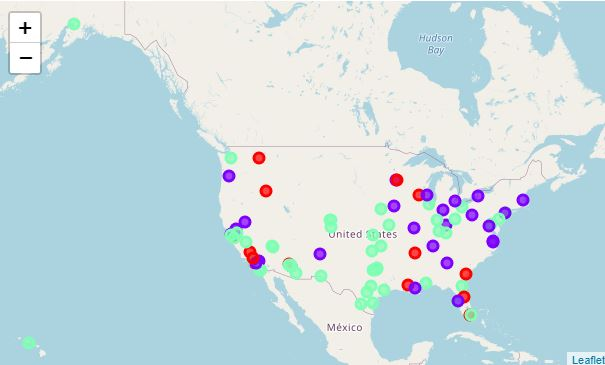

**Now we can also see the rate of crime per 100,000 people per year.**

In [135]:
edu_df2=master_df2.sort_values('Edu Cluster Labels')
edu_df2

Edu Cluster Labels              City  University per capita  \
65                   0           Orlando           0.000000e+00   
35                   0           Hialeah           8.394191e-06   
29                   0           Fremont           0.000000e+00   
80                   0          Savannah           4.116226e-06   
79                   0     Santa Clarita           4.622140e-06   
10                   0             Boise           4.431112e-06   
9                    0       Baton Rouge           0.000000e+00   
84                   0          St. Paul           6.521115e-06   
47                   0        Long Beach           2.121354e-06   
33                   0          Glendale           4.011666e-06   
50                   0           Madison           7.817080e-06   
51                   0           Memphis           4.595835e-06   
7                    0       Bakersfield           7.870834e-06   
82                   0           Spokane           9.213788e-06   
71                   1              Reno           1.609457e-05   
72                   1         Riverside           9.145700e-06   
73                   1        Sacramento           1.200007e-05   
0                    1       Albuquerque           1.068804e-05   
68                   1        Pittsburgh           2.288090e-05   
39                   1            Irvine           1.810840e-05   
90                   1        Washington           1.440980e-05   
62                   1           Oakland           9.413647e-06   
61                   1           Norfolk           1.223541e-05   
60                   1            Newark           1.057556e-05   
58                   1       New Orleans           1.258029e-05   
54                   1         Milwaukee           1.008119e-05   
70                   1          Portland           9.239184e-06   
55                   1       Minneapolis           1.193400e-05   
57                   1         Nashville           1.629770e-05   
13                   1          Chandler           1.604139e-05   
27                   1        Fort Wayne           1.877871e-05   
87                   1             Tampa           1.040691e-05   
4                    1           Atlanta           1.038760e-05   
14                   1        Chesapeake           1.665841e-05   
83                   1         St. Louis           1.611427e-05   
12                   1           Buffalo           1.171102e-05   
11                   1            Boston           1.171469e-05   
78                   1         Santa Ana           1.191544e-05   
24                   1        Des Moines           2.761452e-05   
25                   1           Detroit           1.043543e-05   
1                    1           Anaheim           1.131862e-05   
17                   1        Cincinnati           2.005911e-05   
59                   2          New York           9.284692e-07   
89                   2             Tulsa           7.409822e-06   
86                   2          Stockton           6.460658e-06   
85                   2    St. Petersburg           7.584031e-06   
88                   2            Tucson           3.757117e-06   
76                   2     San Francisco           6.808472e-06   
64                   2             Omaha           4.450497e-06   
66                   2      Philadelphia           5.077447e-06   
67                   2           Phoenix           4.865656e-06   
69                   2             Plano           3.443372e-06   
81                   2           Seattle           8.317565e-06   
77                   2          San Jose           3.855314e-06   
74                   2       San Antonio           1.972760e-06   
63                   2     Oklahoma City           4.627773e-06   
75                   2         San Diego           1.404380e-06   
45                   2         Las Vegas           3.188552e-06   
53                   2             Miami           

# Clustering cities based on their crime rates

In [ ]:
Run k-means to cluster the cities into 3 clusters.

In [136]:
# set number of clusters
kclusters = 3

cities_crime_clusters = master_df2[['Total Violent Crime', 'Total Property crime']]

# run k-means clustering
#creating the KMeans clustering object and fitting it to the real data in one line
kmeans1 = KMeans(n_clusters=kclusters, random_state=0).fit(cities_crime_clusters)

# check cluster labels generated for each row in the dataframe
kmeans1.labels_[0:10] 

array([1, 0, 1, 2, 1, 2, 2, 2, 1, 1])

In [137]:
# add clustering labels
master_df2.insert(0, 'Crime Cluster Labels', kmeans1.labels_)

master_df2

Crime Cluster Labels  Edu Cluster Labels              City  \
0                      1                   1       Albuquerque   
1                      0                   1           Anaheim   
2                      1                   2         Anchorage   
3                      2                   2         Arlington   
4                      1                   1           Atlanta   
5                      2                   2            Aurora   
6                      2                   2            Austin   
7                      2                   0       Bakersfield   
8                      1                   2         Baltimore   
9                      1                   0       Baton Rouge   
10                     0                   0             Boise   
11                     0                   1            Boston   
12                     2                   1           Buffalo   
13                     0                   1          Chandler   
14                     0                   1        Chesapeake   
15                     2                   2           Chicago   
16                     0                   2       Chula Vista   
17                     1                   1        Cincinnati   
18                     1                   2         Cleveland   
19                     2                   2  Colorado Springs   
20                     2                   2          Columbus   
21                     2                   2    Corpus Christi   
22                     2                   2            Dallas   
23                     2                   2            Denver   
24                     2                   1        Des Moines   
25                     1                   1           Detroit   
26                     0                   2           El Paso   
27                     2                   1        Fort Wayne   
28                     2                   2        Fort Worth   
29                     0                   0           Fremont   
30                     2                   2            Fresno   
31                     2                   2           Garland   
32                     0                   2           Gilbert   
33                     2                   0          Glendale   
34                     0                   2         Henderson   
35                     0                   0           Hialeah   
36                     0                   2          Honolulu   
37                     2                   2           Houston   
38                     2                   2      Indianapolis   
39                     0                   1            Irvine   
40                     0                   2            Irving   
41                     2                   2      Jacksonville   
42                     0                   2       Jersey City   
43                     1                   2       Kansas City   
44                     0                   2            Laredo   
45                     2                   2         Las Vegas   
46                     2                   2         Lexington   
47                     0                   0        Long Beach   
48                     0                   2       Los Angeles   
49                     2                   2  Louisville Metro   
50                     0                   0           Madison   
51                     1                   0           Memphis   
52                     0                   2              Mesa   
53                     2                   2             Miami   
54                     2                   1         Milwaukee   
55                     1                   1       Minneapolis   
56                     1                   2            Mobile   
57                     2                   1         Nashville   
58                     2                   1       New Orleans   
59                     0                   2

In [138]:
crime_df1=master_df2.sort_values('Crime Cluster Labels')
crime_df1

Crime Cluster Labels  Edu Cluster Labels              City  \
42                     0                   2       Jersey City   
26                     0                   2           El Paso   
59                     0                   2          New York   
60                     0                   1            Newark   
50                     0                   0           Madison   
32                     0                   2           Gilbert   
69                     0                   2             Plano   
48                     0                   2       Los Angeles   
34                     0                   2         Henderson   
75                     0                   2         San Diego   
16                     0                   2       Chula Vista   
35                     0                   0           Hialeah   
29                     0                   0           Fremont   
14                     0                   1        Chesapeake   
77                     0                   2          San Jose   
11                     0                   1            Boston   
10                     0                   0             Boise   
78                     0                   1         Santa Ana   
79                     0                   0     Santa Clarita   
36                     0                   2          Honolulu   
47                     0                   0        Long Beach   
44                     0                   2            Laredo   
87                     0                   1             Tampa   
39                     0                   1            Irvine   
40                     0                   2            Irving   
1                      0                   1           Anaheim   
13                     0                   1          Chandler   
52                     0                   2              Mesa   
51                     1                   0           Memphis   
0                      1                   1       Albuquerque   
56                     1                   2            Mobile   
62                     1                   1           Oakland   
43                     1                   2       Kansas City   
70                     1                   1          Portland   
74                     1                   2       San Antonio   
76                     1                   2     San Francisco   
81                     1                   2           Seattle   
82                     1                   0           Spokane   
83                     1                   1         St. Louis   
88                     1                   2            Tucson   
89                     1                   2             Tulsa   
55                     1                   1       Minneapolis   
65                     1                   0           Orlando   
91                     1                   2           Wichita   
8                      1                   2         Baltimore   
2                      1                   2         Anchorage   
4                      1                   1           Atlanta   
18                     1                   2         Cleveland   
17                     1                   1        Cincinnati   
9                      1                   0       Baton Rouge   
25                     1                   1           Detroit   
19                     2                   2  Colorado Springs   
71                     2                   1              Reno   
72                     2                   1         Riverside   
73                     2                   1        Sacramento   
15                     2                   2           Chicago   
12                     2                   1           Buffalo   
38                     2                   2      Indianapolis   
80                     2                   0          Savannah   
7                      2                   0

Crime Cluster 0 shows the cities with mid level of property and violent crime.
Crime Cluster 1 shows the cities with low level of property and violent crime.
Crime Cluster 2 shows the cities with high level of property and violent crime.

Also, I need to normalize the numbers.
we may want to normalize multiple features in scikit-learn.
Instead we can use the preprocessing module to simplify many tasks. 
For example, we can standardize each feature simultaneously. 

From sklearn.preprocessing import StandardScaler
We create the object, using standardscaler constructor

SCALE=StandardScaler()       {Standard scaling (normalization)}
SCALE.fit(x_data[['horsepower', 'highway-mpg' ]]) # fit the scale object,

But normalizing is for features that are completely in differetn scales, while here the number of educational centers and crime rate are each from the same scales


## Finally, let's visualize the resulting cities clusters for crime rate

In [139]:
# create map (of Toronto)
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))  
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(crime_df1['Latitude'], crime_df1['Longitude'], crime_df1['City'], crime_df1['Crime Cluster Labels']):
    label = folium.Popup(str(poi) + ' Crime Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
       
map_clusters1

Since the github link does not show the folium map I added a scanned copy of the map from Jupyter Notebook.

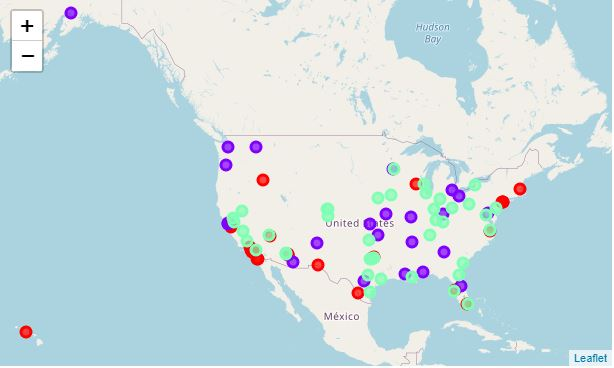

**Author: Iman Soltani**